<a href="https://colab.research.google.com/github/kandelprakashchandra/vis/blob/main/PS6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PS6
**Prakash Kandel**

**Course: 56:834:653:01 DATA VISUALIZATION**

**Spring 2023**

**Instructor: Adam Okulicz-Kozaryn**

**Happiness and its Determinants**



Happiness, or more comprehensively, subjective well-being is the ultimate aim of people. The pursuit of happiness assumes different paths--accumulation of wealth, conflicts, enhancement of social connections, socio-economic equity and justice, empowerment, and many more. Happiness has become the most sought after of the goals and yet elusive. Subjective well-being has become all the more necessary given the frenetic pace of life and the attendant stress and frustration that has robbed us of our desires for peaceful and meaningful lives.Therefore, I will make attempts to probe some of the determinants of happiness.Some of the questions that I seek answers  to are as follows:

1. How does income inequality affect happiness?
2. Does happiness vary by region, income group and countries? Which regions and income groups, and countries are the happiest? 
3. Does gender parity affect happiness?
4. Do better governance indicators mean more happiness?

The hypotheses that I will use are as follows:
1. Highly unequal countries, regions, and income groups are less happy.
2. People are happier in countires that are more affluent, practice good governance, and have impressive educational gender parity.


**Reference:**
<a href="https://www.imf.org/en/Publications/fandd/issues/Series/Back-to-Basics/Recession"> Recession (IMF)</a>


#**PYTHON LIBRARY**

In [ ]:
from statistics import *
import pylab as plt
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import datetime
from pandas_datareader import wb
import sys
import os 
import re
import urllib  
from urllib.request import urlopen                                                
import string                                                                          
import webbrowser 

!pip install folium                                                                    
import folium  

!pip install leafmap
import leafmap

from folium.plugins import MarkerCluster, HeatMap   

!pip install geopandas 
import geopandas as gpd                                  

import json

import numpy as np

from google.colab import drive

import openpyxl
from pathlib import Path

#will display all output not just last command
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

import requests

import zipfile # for unzipping Zipped Files
from io import BytesIO #Byte IO function to  read the contents of the zip file into memory

import matplotlib.pyplot as plt
import seaborn as sns;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.2 MB/s eta 0:00:00
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 29.9 MB/s eta 0:00:00


In [ ]:
from google.colab import output

# Increase the idle timeout to 12 hours
output.eval_js('''
    function ClickConnect(){
        console.log("Working"); 
        document.querySelector("colab-toolbar-button#connect").click() 
    } 
    setInterval(ClickConnect, 1000 * 60 * 30)
''')

1

#DATASETS

## **WORLD GOVERNANCE INDICATORS (WGI):**

As per The World Bank, governance consists "the traditions and institutions by which authority in a country is exercised.  This includes the process by which governments are selected, monitored and replaced; the capacity of the government to effectively formulate and implement sound policies; and the respect of citizens and the state for the institutions that govern economic and social interactions among them."


The World Bank hase been producing world governance reports annually since 1996 to gauge the governance situations in almost all the countires across the globe. It condsiders six composite indicators related to governance which are as follows:
1. Voice and Accountability,
2. Political Stability and Absence of Violence/Terrorism, 
3. Government Effectiveness,
4. Regulatory Quality,
5. Rule of Law, and 
6. Control of Corruption

The data are based on "the views of a large number of enterprise, citizen and expert survey respondents in industrial and developing countries".

Sources:

<a href="https://info.worldbank.org/governance/wgi/"> Worldwide Governance Indicators </a>

<a href="https://info.worldbank.org/governance/wgi/pdf/WGI.pdf"> The Worldwide Governance Indicators: Methodology and Analytical Issues  </a>



In [ ]:
# Extraction of World Governance Indicators directly from the Website

url = "https://info.worldbank.org/governance/wgi/Home/downLoadFile?fileName=wgidataset_stata.zip"
r = requests.get(url)
z = zipfile.ZipFile(BytesIO(r.content)) # for unzipping the zipped STATA File

govindic = pd.read_stata(z.open("wgidataset.dta"))

labels = pd.read_stata(z.open("wgidataset.dta"), iterator=True) #reading labels
labels.variable_labels()

govindic.head()

,code,countryname,year,vae,vas,van,var,val,vau,pve,...,rln,rlr,rll,rlu,cce,ccs,ccn,ccr,ccl,ccu
0,ABW,Aruba,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
govindic.tail(20) # inspecting data to enusre there is no unwanted data at the end

,code,countryname,year,vae,vas,van,var,val,vau,pve,...,rln,rlr,rll,rlu,cce,ccs,ccn,ccr,ccl,ccu
4902,ZWE,Zimbabwe,2002,-1.363361,0.156958,11.0,10.945273,5.472637,15.920398,-1.515870,...,10.0,3.482587,0.000000,8.457711,-1.156760,0.189122,6.0,7.407407,0.529101,23.809525
4903,ZWE,Zimbabwe,2003,-1.431192,0.148406,12.0,9.950249,3.980099,12.935324,-1.087581,...,11.0,2.487562,0.000000,8.457711,-1.188868,0.185884,8.0,6.878307,1.058201,21.164021
4904,ZWE,Zimbabwe,2004,-1.553577,0.144486,13.0,6.250000,2.403846,10.096154,-1.204704,...,13.0,2.884615,0.000000,6.730769,-1.253563,0.168878,10.0,8.866995,0.985222,17.733990
4905,ZWE,Zimbabwe,2005,-1.674941,0.139619,14.0,5.288462,1.923077,8.173077,-1.267644,...,14.0,0.478469,0.000000,3.349282,-1.314617,0.165643,11.0,7.317073,0.000000,15.609756
4906,ZWE,Zimbabwe,2006,-1.539244,0.110492,17.0,7.211538,6.730769,8.653846,-0.931996,...,17.0,0.956938,0.000000,3.827751,-1.372949,0.149107,14.0,4.390244,0.487805,10.243902
4907,ZWE,Zimbabwe,2007,-1.571521,0.112105,17.0,7.211538,4.326923,8.653846,-1.110345,...,17.0,1.435407,0.000000,1.913876,-1.404758,0.155571,14.0,2.912621,0.000000,10.679611
4908,ZWE,Zimbabwe,2008,-1.549031,0.109917,17.0,7.692307,4.326923,9.615385,-1.212338,...,17.0,0.961538,0.000000,2.884615,-1.348838,0.152072,14.0,3.883495,0.970874,12.621359
4909,ZWE,Zimbabwe,2009,-1.539210,0.111639,17.0,7.582938,3.791469,9.952606,-1.167181,...,17.0,0.947867,0.000000,1.421801,-1.357875,0.154961,14.0,3.349282,0.478469,11.961722
4910,ZWE,Zimbabwe,2010,-1.475182,0.110218,17.0,8.056872,5.687204,12.796208,-1.104014,...,17.0,0.947867,0.000000,2.369668,-1.373287,0.150240,15.0,2.857143,0.952381,12.380953
4911,ZWE,Zimbabwe,2011,-1.463763,0.110784,18.0,7.981221,5.164319,12.676056,-0.945329,...,17.0,0.938967,0.000000,1.877934,-1.425627,0.149206,15.0,2.369668,0.000000,10.900474


In [ ]:
govindic.columns # inspecting the var names

Index(['code', 'countryname', 'year', 'vae', 'vas', 'van', 'var', 'val', 'vau',
       'pve', 'pvs', 'pvn', 'pvr', 'pvl', 'pvu', 'gee', 'ges', 'gen', 'ger',
       'gel', 'geu', 'rqe', 'rqs', 'rqn', 'rqr', 'rql', 'rqu', 'rle', 'rls',
       'rln', 'rlr', 'rll', 'rlu', 'cce', 'ccs', 'ccn', 'ccr', 'ccl', 'ccu'],
      dtype='object')

In [ ]:
govindic.info() #data types of variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 0 to 4921
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         4922 non-null   object 
 1   countryname  4922 non-null   object 
 2   year         4922 non-null   int16  
 3   vae          4768 non-null   float32
 4   vas          4768 non-null   float32
 5   van          4768 non-null   float32
 6   var          4768 non-null   float32
 7   val          4768 non-null   float32
 8   vau          4768 non-null   float32
 9   pve          4753 non-null   float32
 10  pvs          4753 non-null   float32
 11  pvn          4753 non-null   float32
 12  pvr          4753 non-null   float32
 13  pvl          4753 non-null   float32
 14  pvu          4753 non-null   float32
 15  gee          4679 non-null   float32
 16  ges          4679 non-null   float32
 17  gen          4679 non-null   float32
 18  ger          4679 non-null   float32
 19  gel   

In [ ]:
govindic.describe() # descriptive statistics of the variables

,year,vae,vas,van,var,val,vau,pve,pvs,pvn,...,rln,rlr,rll,rlu,cce,ccs,ccn,ccr,ccl,ccu
count,4922.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4753.000000,4753.000000,4753.000000,...,4793.000000,4793.000000,4793.000000,4793.000000,4.703000e+03,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000
mean,2009.739130,0.000000,0.174118,9.401846,50.016102,41.539654,57.810894,0.000000,0.284441,5.425626,...,9.409347,50.051483,40.050411,59.126564,-6.488960e-09,0.210343,7.998937,50.051537,39.611240,59.533039
std,7.066972,0.997690,0.080265,4.448198,29.027012,26.720179,30.591827,0.997683,0.082418,2.283097,...,4.405445,29.058060,28.514313,28.658710,9.976578e-01,0.101687,4.155859,29.066736,29.945717,27.025034
min,1996.000000,-2.313395,0.103448,1.000000,0.000000,0.000000,0.966184,-3.312951,0.192247,1.000000,...,1.000000,0.000000,0.000000,0.000000,-1.916457e+00,0.114779,1.000000,0.000000,0.000000,1.904762
25%,2004.000000,-0.820271,0.127144,6.000000,24.882629,16.826923,30.516432,-0.643627,0.231508,4.000000,...,6.000000,24.882629,13.942307,36.492889,-7.733018e-01,0.147936,4.000000,24.879215,12.500000,38.442593
50%,2010.000000,0.052558,0.144501,10.000000,50.000000,40.384617,57.211540,0.110401,0.254975,6.000000,...,10.000000,50.000000,37.980770,58.373207,-2.253539e-01,0.174068,8.000000,50.000000,34.615383,60.189575
75%,2016.000000,0.911884,0.203310,13.000000,75.119125,64.532021,88.888885,0.853993,0.316001,7.000000,...,13.000000,75.961540,62.085308,86.538460,7.416013e-01,0.232341,11.000000,75.480766,64.903847,83.023758
max,2021.000000,1.800992,0.893413,20.000000,100.000000,97.584541,100.000000,1.965062,0.733391,10.000000,...,18.000000,100.000000,97.115387,100.000000,2.459118e+00,0.991055,16.000000,100.000000,97.630333,100.000000


In [ ]:
columns_to_keep = ['code', 'countryname', 'year', 'vae', 'pve', 'gee', 'rqe', 'rle', 'cce'] #keeping only the required variables
govindic = govindic[columns_to_keep]

govindic.head()

,code,countryname,year,vae,pve,gee,rqe,rle,cce
0,ABW,Aruba,1996,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,1998,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2000,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2002,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2003,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Meaningful labels to world governance indicators

new_labels = {'countryname': 'country', 'code':'iso3code', 'vae':'voacest', 'pve' : 'polstabest', 'gee' : 'goveffest', 'rqe':'quaregest', 'rle' : 'ruloflawest', 'cce': 'corcontest'}
govindic= govindic.rename(columns=new_labels)

govindic.head()

,iso3code,country,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest
0,ABW,Aruba,1996,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,1998,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2000,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2002,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2003,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Get the unique values of the 'country' column
unique_values = govindic['country'].unique()

# Print the unique values
print(unique_values)

['Aruba' 'Andorra' 'Afghanistan' 'Angola' 'Anguilla' 'Albania'
 'Netherlands Antilles (former)' 'United Arab Emirates' 'Argentina'
 'Armenia' 'American Samoa' 'Antigua and Barbuda' 'Australia' 'Austria'
 'Azerbaijan' 'Burundi' 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh'
 'Bulgaria' 'Bahrain' 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus'
 'Belize' 'Bermuda' 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam'
 'Bhutan' 'Botswana' 'Central African Republic' 'Canada' 'Switzerland'
 'Chile' 'China' "Côte d'Ivoire" 'Cameroon' 'Congo, Rep.' 'Cook Islands'
 'Colombia' 'Comoros' 'Cape Verde' 'Costa Rica' 'Cuba' 'Cayman Islands'
 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti' 'Dominica' 'Denmark'
 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt, Arab Rep.' 'Eritrea'
 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'Fiji' 'France'
 'Micronesia, Fed. Sts.' 'Gabon' 'United Kingdom' 'Georgia' 'Ghana'
 'Guinea' 'Gambia, The' 'Guinea-Bissau' 'Equatorial Guinea' 'Greece'
 'Grenada' 'Greenland' 'Guatemala' '

## **COUNTRY CODES**

The codes will be used for merger purpose.

Source: <a href="https://www.kaggle.com/datasets/juanumusic/countries-iso-codes?resource=download"> Country Codes </a>

In [ ]:
# Importing of country codes from GITHUB
url = "https://raw.githubusercontent.com/kandelprakashchandra/vis/main/country_codes.csv"
countcodes = pd.read_csv(url)

countcodes.head()

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS


In [ ]:
# Drop column 'ISO 3166-2'
countcodes = countcodes.drop(columns=['ISO 3166-2'], axis=1)
countcodes.head()

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code
0,Afghanistan,AF,AFG,4
1,Åland Islands,AX,ALA,248
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16


In [ ]:
#Rename the country var for making merger smooth
countcodes = countcodes.rename(columns={'English short name lower case': 'country', 'Alpha-2 code': 'iso2code', 'Alpha-3 code': 'iso3code','Numeric code' : 'numcode' }) #ren var

countcodes.dtypes

countcodes.head()

,country,iso2code,iso3code,numcode
0,Afghanistan,AF,AFG,4
1,Åland Islands,AX,ALA,248
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16


In [ ]:
unique_values = govindic['country'].unique()

unique_values

array(['Aruba', 'Andorra', 'Afghanistan', 'Angola', 'Anguilla', 'Albania',
       'Netherlands Antilles (former)', 'United Arab Emirates',
       'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda',
       'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium',
       'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
       'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Belize',
       'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Congo, Rep.', 'Cook Islands', 'Colombia', 'Comoros', 'Cape Verde',
       'Costa Rica', 'Cuba', 'Cayman Islands', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Spain',
       'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia, Fe

## **TOTAL REVENUE AS PERCENTAGE OF GDP**

Source:

<a href="https://data.imf.org/?sk=77413f1d-1525-450a-a23a-47aeed40fe78"> IMF World Revenue Longitudinal Data(WoRLD) </a>

Note: This dataset is related to economic variable.


In [ ]:
urllib.request.urlretrieve("https://drive.google.com/uc?id=1yucHgUR5TXedba87tMBn0eJw993-xDrb", "worldrevimf.dta")

revenueimf = pd.read_stata('worldrevimf.dta')

revenueimf.head()


,ccode,year,var,value,value2,latestyear
0,512.0,1990,Corporate Income Tax Revenue as a % of GDP,NaN,,NaN
1,512.0,1991,Corporate Income Tax Revenue as a % of GDP,NaN,,NaN
2,512.0,1992,Corporate Income Tax Revenue as a % of GDP,NaN,,NaN
3,512.0,1993,Corporate Income Tax Revenue as a % of GDP,NaN,,NaN
4,512.0,1994,Corporate Income Tax Revenue as a % of GDP,NaN,,NaN


In [ ]:
revenueimf = revenueimf[revenueimf ['var'].isin(['Total Revenue as a % of GDP'])] # Here, I only kept the variable value of interest which is "Total Revenue as a % of GDP"


revenueimf = revenueimf.drop(['value2', 'latestyear'], axis=1) # dropped variables that do not have data or are not required

revenueimf. head()

,ccode,year,var,value
69190,512.0,1990,Total Revenue as a % of GDP,NaN
69191,512.0,1991,Total Revenue as a % of GDP,NaN
69192,512.0,1992,Total Revenue as a % of GDP,NaN
69193,512.0,1993,Total Revenue as a % of GDP,NaN
69194,512.0,1994,Total Revenue as a % of GDP,NaN


In [ ]:
revenueimf = revenueimf.rename(columns={'ccode':'weocode','value':'totrevgdp'}) # renaming a variable that has values for total revenue as a percentage of GDP

revenueimf.head()
revenueimf.dtypes

weocode      float64
year           int16
var           object
totrevgdp    float64
dtype: object

In [ ]:
# Get the unique values of the variable 'year' to see the range and to limit the number of years
unique_values =revenueimf['year'].unique()

# Print the unique values
unique_values

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int16)

In [ ]:
revenueimf = revenueimf[revenueimf['year']>1999] #selected years from 2000 onwards

revenueimf = revenueimf.drop(['var'], axis=1) # dropped the variable after taking it as reference to rename var representing the total revenue as a percentage of GDP

revenueimf.head()
revenueimf.dtypes

weocode      float64
year           int16
totrevgdp    float64
dtype: object

In [ ]:
# Get the unique values of the 'wecode' column
unique_values = revenueimf['weocode'].unique()

# Print the unique values
print(unique_values)

[512. 914. 612. 614. 312. 311. 213. 911. 314. 193. 122. 912. 313. 419.
 513. 316. 913. 124. 339. 638. 514. 218. 963. 616. 223. 516. 918. 748.
 618. 624. 522. 622. 156. 626. 628. 228. 924. 233. 632. 636. 634. 238.
 960. 423. 935. 662. 128. 611. 321. 243. 248. 469. 253. 642. 643. 939.
 734. 644.  nan 819. 172. 132. 646. 648. 915. 134. 652. 174. 328. 258.
 656. 654. 336. 263. 268. 532. 944. 176. 534. 536. 429. 433. 178. 436.
 136. 343. 158. 439. 916. 664. 826. 542. 967. 443. 917. 544. 941. 446.
 666. 668. 672. 946. 137. 546. 674. 676. 548. 556. 678. 181. 867. 682.
 684. 273. 868. 921. 948. 943. 351. 686. 688. 518. 728. 836. 558. 138.
 196. 278. 692. 694. 962. 142. 449. 564. 565. 283. 853. 288. 293. 566.
 964. 182. 453. 968. 922. 714. 862. 135. 456. 722. 942. 718. 724. 576.
 936. 961. 813. 726. 199. 733. 184. 524. 361. 362. 364. 732. 366. 144.
 146. 463. 716. 528. 923. 738. 578. 537. 742. 866. 369. 744. 186. 925.
 869. 746. 926. 466. 112. 111. 298. 927. 846. 299. 582. 487. 474. 754.
 698.]

In [ ]:
non_numeric_rows = revenueimf[revenueimf['weocode'].isnull()] # I used this code to examine the country code with the value 'NaN", and it appears that the code representing a certian county is missing.

non_numeric_rows.head(25) # The country code "NaN" does not represent any country; therefore, it will be dropped after inspection.

,weocode,year,totrevgdp
71050,NaN,2000,41.822678
71051,NaN,2001,41.250065
71052,NaN,2002,41.264835
71053,NaN,2003,41.154495
71054,NaN,2004,41.134060
71055,NaN,2005,41.727787
71056,NaN,2006,41.824867
71057,NaN,2007,41.984627
71058,NaN,2008,41.669476
71059,NaN,2009,41.550579


In [ ]:
revenueimf = revenueimf[revenueimf.weocode.notnull()] # The country code which was missing was dropped.

revenueimf['weocode'].isna().sum() # to check if there was any missing value remanining for the country code

0

In [ ]:
revenueimf['weocode'] = revenueimf['weocode'].astype(int) # The country codes had to be converted to integer form as they are not identified by decimals.

revenueimf.head()

,weocode,year,totrevgdp
69200,512,2000,NaN
69201,512,2001,NaN
69202,512,2002,6.844626
69203,512,2003,9.825829
69204,512,2004,12.675875


In [ ]:
# collapsing the variables for means using 'code' and 'total revenue' vars to aggregate
collapseimf= revenueimf.groupby(['weocode']).agg({'totrevgdp': 'sum'})

collapseimf.tail()

,totrevgdp
weocode,
962,645.829033
963,938.589279
964,834.374149
967,480.206612
968,643.321339


## **HAPPINESS AND LIFE SATISFACTION**

"The underlying source of the happiness scores  is the Gallup World Poll—a set of nationally representative surveys undertaken in more than 160 countries in over 140 languages. The main life evaluation question asked in the poll is: “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?” (Also known as the “Cantril Ladder”.) As with the steps of the ladder, values in the map range from 0 to 10."

Source : <a href="https://ourworldindata.org/happiness-and-life-satisfaction"> Our World in Data</a>

In [ ]:
urllib.request.urlretrieve("https://drive.google.com/uc?id=17YQvGUWoFKEhJPJxR1Uac4wahZVkFdXK&export=download", "worldhappiness.csv") # World Happiness Data

happy = pd.read_csv('worldhappiness.csv')
happy.head()

happy.shape

(2244, 4)

In [ ]:
# Meaningful labels to data variables

new_labels = {'Entity': 'country', 'Code':'iso3code', 'Year': 'year', 'Life satisfaction in Cantril Ladder (World Happiness Report 2022)':'happy_score'}
happy= happy.rename(columns=new_labels)

happy.head()

,country,iso3code,year,happy_score
0,Afghanistan,AFG,2006,3.723590
1,Afghanistan,AFG,2007,4.401778
2,Afghanistan,AFG,2008,4.758381
3,Afghanistan,AFG,2009,3.831719
4,Afghanistan,AFG,2010,3.782938


## **WORLD INCOME INEQUALITY**

Source : <a href="https://doi.org/10.35188/UNU-WIDER/WIID-300622"> UNU-WIDER, World Income Inequality Database (WIID). Version 30 June 2022</a>

In [ ]:
urllib.request.urlretrieve("https://drive.google.com/uc?id=1Txs_iKUT3r92t-C1SCg49JajJU2YSLC7&export=download", "WIID_30JUN2022_0.dta")

winequality = pd.read_stata('WIID_30JUN2022_0.dta')

winequality= winequality[winequality['year']>1999] # keeping years from 2000 onwards

# set the display options to show all columns so as to find the variables to keep
pd.set_option('display.max_columns', None)

labels = pd.read_stata(('WIID_30JUN2022_0.dta'), iterator=True) #reading labels
labels.variable_labels()

winequality.head()

,id,country,c3,c2,year,gini,ge0,ge1,ge2,a025,a050,a075,a1,a2,palma,ratio_top20bottom20,bottom40,q1,q2,q3,q4,q5,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,bottom5,top5,resource,resource_detailed,scale,scale_detailed,sharing_unit,reference_unit,areacovr,areacovr_detailed,popcovr,popcovr_detailed,region_un,region_un_sub,region_wb,eu,oecd,incomegroup,mean,median,currency,reference_period,exchangerate,mean_usd,median_usd,gdp,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,link,wiidcompanion
0,1.0,Afghanistan,AFG,AF,2008.0,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.33,22.00,9.00,13.00,17.00,22.00,39.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumption,Consumption,Per capita,Per capita,Household,Person,All,All,All,All,Asia,Southern Asia,South Asia,Non-EU,Non-OECD,Low income,31856.0,NaN,Afghan afghani 2016,Year,NaN,NaN,NaN,1484.0,27722282.0,New 2019,High,12.0,National statistical authority,European Union and the Central Statistics Orga...,,Living Conditions Survey (LCS),https://cso-of-afghanistan.shinyapps.io/ALCS_D...,Yes
1,2.0,Afghanistan,AFG,AF,2012.0,33.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.11,23.00,9.00,14.00,17.00,22.00,37.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumption,Consumption,Per capita,Per capita,Household,Person,All,All,All,All,Asia,Southern Asia,South Asia,Non-EU,Non-OECD,Low income,32724.0,NaN,Afghan afghani 2016,Year,NaN,NaN,NaN,2075.0,31161378.0,New 2019,High,12.0,National statistical authority,European Union and the Central Statistics Orga...,,Living Conditions Survey (LCS),https://cso-of-afghanistan.shinyapps.io/ALCS_D...,Yes
2,3.0,Afghanistan,AFG,AF,2017.0,31.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.44,22.00,9.00,13.00,16.00,22.00,40.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumption,Consumption,Per capita,Per capita,Household,Person,All,All,All,All,Asia,Southern Asia,South Asia,Non-EU,Non-OECD,Low income,26792.0,NaN,Afghan afghani 2016,Year,NaN,NaN,NaN,2058.0,36296108.0,New 2019,High,12.0,National statistical authority,European Union and the Central Statistics Orga...,,Living Conditions Survey (LCS),https://eeas.europa.eu/regions/asia/44072/resu...,Yes
4,5.0,Albania,ALB,AL,2002.0,31.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.22,4.83,20.93,8.35,12.58,16.49,22.21,40.36,3.49,4.86,5.84,6.74,7.65,8.84,10.23,11.98,14.93,25.44,NaN,NaN,Consumption,Consumption,Per capita,Per capita,Household,Person,All,All,All,All,Europe,Southern Europe,Europe and Central Asia,Non-EU,Non-OECD,Upper middle income,2451.0,2022.0,US$2011PPP,Year,NaN,NaN,NaN,6754.0,3126183.0,New 2022,Average,13.0,World Bank,Poverty and Inequality Platform (PIP),Series 2002-2012,LSMS,https://pip.worldbank.org/,Yes
5,6.0,Albania,ALB,AL,2005.0,30.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.14,4.66,21.30,8.40,12.90,17.03,22.50,39.18,3.48,4.92,5.98,6.92,7.99,9.04,10.37,12.13,14.83,24.34,NaN,NaN,Consumption,Consumption,Per capita,Per capita,Household,Person,All,All,All,All,Europe,Southern Europe,Europe and Central Asia,Non-EU,Non-OECD,Upper middle income,2771.0,2358.0,US$2011PPP,Year,NaN,NaN,NaN,8040.0,3086810.0,New 2022,Average,13.0,World Bank,Poverty and Inequality Platform (PIP),Series 2002-2012,LSMS,https://pip.worldbank.org/,Yes


In [ ]:
# converting  the 'year' column to integer using astype() method
winequality['year'] = winequality['year'].astype(int)

# Getting the unique values of the 'Year' column
unique_values1 = winequality['year'].unique()

# Print the unique values
print(unique_values1)

[2008 2012 2017 2002 2005 2014 2015 2016 2018 2019 2020 2001 2003 2009
 2000 2004 2006 2007 2010 2011 2013 2021]


In [ ]:
#keeping only the required columns
winequality= winequality.loc[:, ['country', 'c3', 'gini','year','ratio_top20bottom20',
                                 'resource', 'region_un','region_un_sub', 'gdp','population' ]]

# renaming variables
winequality= winequality.rename(columns={'c3': 'iso3code'})

print(winequality['resource'].unique()) # for finding out the unique values of  the 'resource' variable and selecting a specific one 

winequality = winequality.loc[winequality['resource'] == 'Consumption',   # selected the value "Income (gross)" of the 'resource' variable to redo the dataframe
                              ['country',	'iso3code','gini',	'year', 'ratio_top20bottom20',
                               'gdp', 'population']]

# The above code was used to extract specific value of the "resource" var 

# Reordering the variables
winequality = winequality[['country',	'iso3code',	'gini',	'year',	'ratio_top20bottom20', 'gdp',	'population']]

winequality.head(100) 
winequality.tail()

['Consumption', 'Income (net)', 'Income (net/gross)', 'Earnings', 'Income (gross)']
Categories (5, object): ['Income (net)' < 'Income (net/gross)' < 'Income (gross)' < 'Consumption' <
                         'Earnings']


,country,iso3code,gini,year,ratio_top20bottom20,gdp,population
22753,Zimbabwe,ZWE,37.00,2011,NaN,3204.0,12894323.0
22754,Zimbabwe,ZWE,39.00,2011,NaN,3204.0,12894323.0
22755,Zimbabwe,ZWE,43.15,2011,8.53,3204.0,12894323.0
22756,Zimbabwe,ZWE,44.34,2017,8.58,3796.0,14236599.0
22757,Zimbabwe,ZWE,50.26,2019,NaN,3630.0,14645473.0


In [ ]:
#winequality1 = winequality.loc[winequality['resource'] == 'Consumption', ['country',	'iso3code','gini',	'year', 'ratio_top20bottom20', 'gdp', 'population','resource','incomegroup','region_wb']]
#winequality1.head()
                                                                        

In [ ]:
winequality.head()

,country,iso3code,gini,year,ratio_top20bottom20,gdp,population
0,Afghanistan,AFG,29.00,2008,4.33,1484.0,27722282.0
1,Afghanistan,AFG,33.00,2012,4.11,2075.0,31161378.0
2,Afghanistan,AFG,31.00,2017,4.44,2058.0,36296108.0
4,Albania,ALB,31.74,2002,4.83,6754.0,3126183.0
5,Albania,ALB,30.60,2005,4.66,8040.0,3086810.0


In [ ]:
winequality.describe() # descriptive statistics of the variables

,gini,year,ratio_top20bottom20,gdp,population
count,1754.000000,1787.000000,1546.000000,1778.000000,1.787000e+03
mean,36.104390,2009.466704,6.723959,14237.831271,1.144474e+08
std,7.259572,5.360402,4.057344,12407.738752,2.932762e+08
min,21.930000,2000.000000,1.890000,728.000000,1.020800e+04
25%,31.100000,2005.000000,4.630000,4870.750000,5.399162e+06
50%,35.470000,2010.000000,5.900000,10531.000000,2.032138e+07
75%,39.722500,2014.000000,7.460000,18937.000000,8.153441e+07
max,69.770000,2021.000000,46.600000,95500.000000,1.433784e+09


## **LITERACY DATA**

Source: 
Source : <a href="https://pypi.org/project/wbgapi/"> World Bank Data API</a>

Python (wbgapi package)

In [ ]:
!pip install wbgapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!pip install wbgapi #Installing World Bank API for variable download

import wbgapi as wb

wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2023-03-30
3,Worldwide Governance Indicators,WGI,3,2022-09-23
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-12-06
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2020-12-20
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2023-03-06
15,Global Economic Monitor,GEM,3,2020-07-27


In [ ]:
#help(wb.economy) 

In [ ]:
wb.series.info()        # Doing Business by default
wb.db = 2              # Change default database to the one containing HUMAN DEVELOPMENT INDICATORS DATABASE
wb.series.info()        # HUMAN DEVELOPMENT INDICATORS

id,value
AG.AGR.TRAC.NO,"Agricultural machinery, tractors"
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2,Agricultural land (sq. km)
AG.LND.AGRI.ZS,Agricultural land (% of land area)
AG.LND.ARBL.HA,Arable land (hectares)
AG.LND.ARBL.HA.PC,Arable land (hectares per person)
AG.LND.ARBL.ZS,Arable land (% of land area)
AG.LND.CREL.HA,Land under cereal production (hectares)
AG.LND.CROP.ZS,Permanent cropland (% of land area)


In [ ]:
wb.economy.info() # Name of countries and the regions they are in

id,value,region,incomeLevel
ABW,Aruba,LCN,HIC
AFE,Africa Eastern and Southern,,
AFG,Afghanistan,SAS,LIC
AFW,Africa Western and Central,,
AGO,Angola,SSF,LMC
ALB,Albania,ECS,UMC
AND,Andorra,ECS,HIC
ARB,Arab World,,
ARE,United Arab Emirates,MEA,HIC
ARG,Argentina,LCN,UMC


In [ ]:
wb.search('literacy') #searching for literacy indicators for males and females

ID,Name,Field,Value
IQ.SPI.PIL5,Statistical performance indicators (SPI): Pillar 5 data infrastructure score (scale 0-100),Developmentrelevance,...level of skills within the statistical system and among users (statistical literacy); (iv) partnerships reflecting the need for the statistical system to be...
IQ.SPI.PIL5,Statistical performance indicators (SPI): Pillar 5 data infrastructure score (scale 0-100),Longdefinition,...level of skills within the statistical system and among users (statistical literacy); (iv) partnerships reflecting the need for the statistical system to be...
IT.BBD.USEC.CD,Fixed broadband sub-basket (US$ per month),Developmentrelevance,...enable them to reach rural populations with low levels of income and literacy. The next billion mobile subscribers will consist mainly of the rural poor....
IT.CEL.SETS,Mobile cellular subscriptions,Developmentrelevance,...enable them to reach rural populations with low levels of income and literacy. The next billion mobile subscribers will consist mainly of the rural poor....
IT.CEL.SETS.P2,Mobile cellular subscriptions (per 100 people),Developmentrelevance,...enable them to reach rural populations with low levels of income and literacy. The next billion mobile subscribers will consist mainly of the rural poor....
IT.INT.CTRF.MN.PC,"International voice traffic, mobile cellular network (minutes per person)",Developmentrelevance,...enable them to reach rural populations with low levels of income and literacy. The next billion mobile subscribers will consist mainly of the rural poor....
IT.MBL.USEC.CD,Mobile cellular sub-basket (US$ per month),Developmentrelevance,...enable them to reach rural populations with low levels of income and literacy. The next billion mobile subscribers will consist mainly of the rural poor....
IT.NET.BBND.P2,Fixed broadband subscriptions (per 100 people),Developmentrelevance,...enable them to reach rural populations with low levels of income and literacy. The next billion mobile subscribers will consist mainly of the rural poor....
IT.NET.BNDW.PC,International Internet bandwidth (bits per second per Internet user),Developmentrelevance,...enable them to reach rural populations with low levels of income and literacy. The next billion mobile subscribers will consist mainly of the rural poor....
IT.NET.SECR,Secure Internet servers,Developmentrelevance,...enable them to reach rural populations with low levels of income and literacy. The next billion mobile subscribers will consist mainly of the rural poor....


In [ ]:
# SE.ADT.LITR.MA.ZS	#Literacy rate, adult male (% of males ages 15 and above)
# SE.ADT.LITR.FE.ZS	#Literacy rate, adult female (% of females ages 15 and above)


Important Link
https://deepnote.com/@carlos-mendez/PYTHON-World-Bank-data-7d57b121-2bdf-4f13-b8d9-9520c9f8a7cc

In [ ]:
wbliteracy = wb.data.DataFrame(['SE.ADT.LITR.MA.ZS', 'SE.ADT.LITR.FE.ZS'], 
                                time=range(2000, 2021),
                                labels=True,
                                skipAggs=True, 
                                skipBlanks=True,
                                columns='series').reset_index() 
                               
# SE.ADT.LITR.MA.ZS	=Literacy rate, adult male (% of males ages 15 and above)
# SE.ADT.LITR.FE.ZS	=Literacy rate, adult female (% of females ages 15 and above)                                columns='series').reset_index()
wbliteracy.head(10)                              

,economy,time,Country,Time,SE.ADT.LITR.FE.ZS,SE.ADT.LITR.MA.ZS
0,ZWE,YR2014,Zimbabwe,2014,88.283829,89.185371
1,ZWE,YR2011,Zimbabwe,2011,80.065659,87.764809
2,ZMB,YR2020,Zambia,2020,84.300003,91.000000
3,ZMB,YR2018,Zambia,2018,83.083443,90.601181
4,ZMB,YR2010,Zambia,2010,77.746643,88.684029
5,ZMB,YR2007,Zambia,2007,51.786968,71.317619
6,ZMB,YR2002,Zambia,2002,61.839279,80.912857
7,YEM,YR2004,"Yemen, Rep.",2004,35.000000,73.160004
8,PSE,YR2020,West Bank and Gaza,2020,96.201668,98.793800
9,PSE,YR2019,West Bank and Gaza,2019,95.914886,98.804420


In [ ]:
wbliteracy.dtypes

economy               object
time                  object
Country               object
Time                  object
SE.ADT.LITR.FE.ZS    float64
SE.ADT.LITR.MA.ZS    float64
dtype: object

In [ ]:
# renaming the variables
wbliteracy =wbliteracy.rename(columns={'Time': 'year', 'SE.ADT.LITR.FE.ZS': 'femlit_%', 'SE.ADT.LITR.MA.ZS': 'malelit_%', 'Country': 'country' })

# converting the "year" column from  the object column to integer using astype() method
wbliteracy['year'] = wbliteracy['year'].astype(int)

wbliteracy=wbliteracy.drop(columns={'time'}) # dropping year variable as it repeats

wbliteracy.head()

,economy,country,year,femlit_%,malelit_%
0,ZWE,Zimbabwe,2014,88.283829,89.185371
1,ZWE,Zimbabwe,2011,80.065659,87.764809
2,ZMB,Zambia,2020,84.300003,91.000000
3,ZMB,Zambia,2018,83.083443,90.601181
4,ZMB,Zambia,2010,77.746643,88.684029


In [ ]:
#calculation of gender parity
wbliteracy['gender_parity'] = wbliteracy['femlit_%'] / wbliteracy['malelit_%'] 
wbliteracy.head()

,economy,country,year,femlit_%,malelit_%,gender_parity
0,ZWE,Zimbabwe,2014,88.283829,89.185371,0.989891
1,ZWE,Zimbabwe,2011,80.065659,87.764809,0.912275
2,ZMB,Zambia,2020,84.300003,91.000000,0.926374
3,ZMB,Zambia,2018,83.083443,90.601181,0.917024
4,ZMB,Zambia,2010,77.746643,88.684029,0.876670


In [ ]:
wbliteracy.dtypes # rechecking the conversion

economy           object
country           object
year               int64
femlit_%         float64
malelit_%        float64
gender_parity    float64
dtype: object

In [ ]:
unique_values2 = wbliteracy['country'].unique() # unique values of countries after merge

# Print the unique values
print(unique_values2)

['Zimbabwe' 'Zambia' 'Yemen, Rep.' 'West Bank and Gaza' 'Vietnam'
 'Venezuela, RB' 'Vanuatu' 'Uzbekistan' 'Uruguay' 'United Arab Emirates'
 'Ukraine' 'Uganda' 'Turkmenistan' 'Turkiye' 'Tunisia'
 'Trinidad and Tobago' 'Tonga' 'Togo' 'Timor-Leste' 'Thailand' 'Tanzania'
 'Tajikistan' 'Syrian Arab Republic' 'Suriname' 'Sudan' 'Sri Lanka'
 'Spain' 'South Sudan' 'South Africa' 'Solomon Islands' 'Slovenia'
 'Singapore' 'Sierra Leone' 'Seychelles' 'Serbia' 'Senegal' 'Saudi Arabia'
 'Sao Tome and Principe' 'Samoa' 'Rwanda' 'Russian Federation' 'Romania'
 'Qatar' 'Puerto Rico' 'Portugal' 'Poland' 'Philippines' 'Peru' 'Paraguay'
 'Papua New Guinea' 'Panama' 'Palau' 'Pakistan' 'Oman' 'North Macedonia'
 'Nigeria' 'Niger' 'Nicaragua' 'New Caledonia' 'Nepal' 'Namibia' 'Myanmar'
 'Mozambique' 'Morocco' 'Montenegro' 'Mongolia' 'Moldova' 'Mexico'
 'Mauritius' 'Mauritania' 'Marshall Islands' 'Malta' 'Mali' 'Maldives'
 'Malaysia' 'Malawi' 'Madagascar' 'Macao SAR, China' 'Lithuania' 'Libya'
 'Liberia' 'Les

## **COUNTRY CLASSIFICATION BY INCOME GROUPS AND REGIONS**

The reason for importing this datasheEt is to merge with the previous dataset for the purpose of finding information by income groups and regions.

Source : <a href="https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html#:~:text=The%20World%20Bank%20classifies%20economies,%2Dmiddle%2C%20and%20high%20income."> Country Classifications by Income and Region (World Bank)</a>

In [ ]:
urllib.request.urlretrieve("https://drive.google.com/uc?id=1wrlPomGxAVBSg1VWyUfwoeYkUIJ-jWS6", "countclass.csv")

countclass = pd.read_csv('countclass.csv')

countclass.head()

#https://drive.google.com/file/d/1wrlPomGxAVBSg1VWyUfwoeYkUIJ-jWS6/view?usp=share_link

,Country,Income group,Region,Lending category,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,High income,Latin America & Caribbean,NaN,NaN,10360.0,11760.0,12230.0,13190.0,13990.0,14620.0,15640.0,16230.0,16370.0,17220.0,17620.0,17880.0,20000.0,19170.0,17890.0,20070.0,22630.0,19200.0,23340.0,21680.0,25510.0,23770.0,22380.0,22450.0,23520.0,24510.0,25350.0,26560.0,26840.0,27120.0,NaN,NaN,NaN
1,Afghanistan,Low income,South Asia,IDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450.0,510.0,530.0,630.0,660.0,630.0,600.0,550.0,530.0,520.0,530.0,500.0
2,Angola,Lower middle income,Sub-Saharan Africa,IBRD,670.0,650.0,860.0,780.0,1380.0,1170.0,NaN,330.0,440.0,320.0,450.0,410.0,330.0,360.0,390.0,590.0,710.0,1010.0,1370.0,1810.0,2460.0,3030.0,3170.0,3230.0,3410.0,4170.0,4780.0,5010.0,4520.0,3770.0,3450.0,3210.0,2970.0,2230.0
3,Albania,Upper middle income,Europe & Central Asia,IBRD,730.0,730.0,760.0,650.0,410.0,280.0,320.0,380.0,640.0,890.0,800.0,860.0,950.0,1100.0,1280.0,1370.0,1650.0,2100.0,2620.0,3050.0,3460.0,4030.0,4280.0,4360.0,4410.0,4360.0,4540.0,4540.0,4390.0,4320.0,4290.0,4860.0,5220.0,5210.0
4,Andorra,High income,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
countclass = countclass[['Country',	'Income group', 'Region']]

countclass =countclass.rename(columns={'Country':'country'})


countclass.head()


,country,Income group,Region
0,Aruba,High income,Latin America & Caribbean
1,Afghanistan,Low income,South Asia
2,Angola,Lower middle income,Sub-Saharan Africa
3,Albania,Upper middle income,Europe & Central Asia
4,Andorra,High income,Europe & Central Asia


# **Merge**

## **Merge 1**

World Governance and Country Codes

In [ ]:
codegovmerged =pd.merge(countcodes, govindic, how='outer',  on=["country"], indicator=True) # merging on a common id variable 'code' and with the dataframe for country codes on the left
# Here the "inner" parameter was used to get numeric codes for countries in the dataset with the World Governace Indicators
codegovmerged.head(10)
codegovmerged.tail(10)

,country,iso2code,iso3code_x,numcode,iso3code_y,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,_merge
4980,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2012.0,-1.481082,-2.085893,-1.645317,-1.479630,-1.662914,-1.329711,right_only
4981,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2013.0,-1.458554,-2.192191,-1.467610,-1.260716,-1.584832,-1.338081,right_only
4982,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2014.0,-1.286946,-2.167921,-1.565616,-1.373450,-1.462761,-1.320771,right_only
4983,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2015.0,-1.304218,-2.150854,-1.602174,-1.336872,-1.590687,-1.291259,right_only
4984,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2016.0,-1.412191,-2.234622,-1.521073,-1.311466,-1.640507,-1.348747,right_only
4985,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2017.0,-1.465298,-2.302249,-1.634874,-1.467066,-1.705662,-1.428617,right_only
4986,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2018.0,-1.507611,-2.105781,-1.539629,-1.465463,-1.794962,-1.500561,right_only
4987,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2019.0,-1.313973,-1.593899,-1.618209,-1.499778,-1.798251,-1.539866,right_only
4988,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2020.0,-1.265429,-1.742298,-1.714081,-1.491252,-1.802082,-1.574677,right_only
4989,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2021.0,-1.198189,-1.614667,-1.718878,-1.422889,-1.703835,-1.552154,right_only


In [ ]:
unique_values = codegovmerged['_merge'].unique() # inspecting whether the merge was smooth 

print(unique_values)

['both', 'left_only', 'right_only']
Categories (3, object): ['left_only', 'right_only', 'both']


In [ ]:
# Showing rows with `right only` values
right_only = codegovmerged[codegovmerged['_merge'] == 'right_only']

right_only

,country,iso2code,iso3code_x,numcode,iso3code_y,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,_merge
4162,Netherlands Antilles (former),NaN,NaN,NaN,ANT,1996.0,NaN,NaN,NaN,NaN,NaN,NaN,right_only
4163,Netherlands Antilles (former),NaN,NaN,NaN,ANT,1998.0,NaN,NaN,NaN,NaN,NaN,NaN,right_only
4164,Netherlands Antilles (former),NaN,NaN,NaN,ANT,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,right_only
4165,Netherlands Antilles (former),NaN,NaN,NaN,ANT,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,right_only
4166,Netherlands Antilles (former),NaN,NaN,NaN,ANT,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2017.0,-1.465298,-2.302249,-1.634874,-1.467066,-1.705662,-1.428617,right_only
4986,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2018.0,-1.507611,-2.105781,-1.539629,-1.465463,-1.794962,-1.500561,right_only
4987,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2019.0,-1.313973,-1.593899,-1.618209,-1.499778,-1.798251,-1.539866,right_only
4988,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2020.0,-1.265429,-1.742298,-1.714081,-1.491252,-1.802082,-1.574677,right_only


In [ ]:
# Showing rows with `left only` values
left_only = codegovmerged[codegovmerged['_merge'] == 'left_only']

print(left_only)

                             country iso2code iso3code_x  numcode iso3code_y  \
23                     Åland Islands       AX        ALA    248.0        NaN   
162                       Antarctica       AQ        ATA     10.0        NaN   
324                          Bahamas       BS        BHS     44.0        NaN   
601                    Bouvet Island       BV        BVT     74.0        NaN   
625   British Indian Ocean Territory       IO        IOT     86.0        NaN   
...                              ...      ...        ...      ...        ...   
4111         Virgin Islands, British       VG        VGB     92.0        NaN   
4112            Virgin Islands, U.S.       VI        VIR    850.0        NaN   
4113               Wallis and Futuna       WF        WLF    876.0        NaN   
4114                  Western Sahara       EH        ESH    732.0        NaN   
4115                           Yemen       YE        YEM    887.0        NaN   

      year  voacest  polstabest  goveff

In [ ]:
# Check for missing values in merged dataframe
print("\nMissing values in merged df:")
print(codegovmerged.isna().sum())


Missing values in merged df:
country          0
iso2code       851
iso3code_x     828
numcode        828
iso3code_y      68
year            68
voacest        222
polstabest     237
goveffest      311
quaregest      309
ruloflawest    197
corcontest     287
_merge           0
dtype: int64


In the folowing line with cods,  the 'codegovmerged' data frame is the result of merging 'countcodes' and 'govindic' on the common id column using an outer join, which includes all rows from both data frames. The set() function is used to create sets of the id values in dataframes, namely codegovmerged, countcodes, and govindic. The intersection() function is used to find the common id values between countcodes and govindic, and the difference() function is used to find the id values in 'codegovmerged' that are not in the common set. Finally, the resulting set of id values is printed to the console.

In [ ]:
# Finding  the 'country ids'  that did not merge
not_merged_ids = set(codegovmerged['country']).difference(set(countcodes['country']).intersection(set(govindic['country'])))

not_merged_ids

{'Antarctica',
 'Bahamas',
 'Bahamas, The',
 'Bouvet Island',
 'British Indian Ocean Territory',
 'Christmas Island',
 'Cocos (Keeling) Islands',
 'Congo',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Congo, the Democratic Republic of the',
 'Egypt',
 'Egypt, Arab Rep.',
 'Eswatini',
 'Falkland Islands (Malvinas)',
 'Faroe Islands',
 'French Polynesia',
 'French Southern Territories',
 'Gambia',
 'Gambia, The',
 'Gibraltar',
 'Guadeloupe',
 'Guernsey',
 'Heard Island and McDonald Islands',
 'Holy See (Vatican City State)',
 'Hong Kong',
 'Hong Kong SAR, China',
 'Iran',
 'Iran, Islamic Rep.',
 'Isle of Man',
 'Jersey',
 'Jersey, Channel Islands',
 'Korea, Dem. Rep.',
 "Korea, Democratic People's Republic of",
 'Korea, Rep.',
 'Korea, Republic of (South Korea)',
 'Kosovo',
 'Kyrgyz Republic',
 'Kyrgyzstan',
 'Lao PDR',
 "Lao People's Democratic Republic",
 'Libya',
 'Libyan Arab Jamahiriya',
 'Macao',
 'Macao SAR, China',
 'Macedonia, the former Yugoslav Republic of',
 'Mayotte',
 'Micronesia

In [ ]:
# Making the names of the countries uniform after merger using "replace" command
codegovmerged = codegovmerged.replace({'country' : { 'Bahamas, The': 'Bahamas', 'Egypt, Arab Rep.': 'Egypt',
                                   'Brunei Darussalam': 'Brunei','Congo, Rep.': 'Congo', 
                                   'Congo, the Democratic Republic of the': 'Congo, Dem. Rep.', 'Gambia, The': 'Gambia',
                                 'Iran, Islamic Rep.': 'Iran','Korea, Rep.':'South Korea', 
                                 'Korea, Republic of (South Korea)':'South Korea', 
                                 'Kyrgyz Republic': 'Kyrgyzstan','Lao PDR': 'Laos', "Lao People's Democratic Republic": 'Laos', 
                                   'Libyan Arab Jamahiriya': 'Libya','Macedonia, the former Yugoslav Republic of': 'Macedonia',
                                   'Micronesia, Federated States of': 'Micronesia', 'Micronesia, Fed. Sts.': 'Micronesia',
                                   'Moldova, Republic of':'Moldova','Korea, Dem. Rep.': 'North Korea', 
                                   "Korea, Democratic People's Republic of": 'North Korea', 'Russian Federation': 'Russia',
                                    'Slovak Republic':'Slovakia',  'Swaziland':'Eswatini', 'Türkiye':'Turkey',
                                    'Taiwan, China': 'Taiwan', 'Tanzania, United Republic of':'Tanzania', 
                                    'United States':'United States of America', 'United States Of America':'United States of America' , 
                                    'Holy See (Vatican City State)': 'Vatican City State', 'Venezuela, RB': 'Venezuela',
                                     'Yemen, Rep.': 'Yemen', }})

In [ ]:
#dropping names that are not countries
codegovmerged= codegovmerged.drop(codegovmerged.index[codegovmerged['country'].isin(['Antarctica', 'Bouvet Island', 'British Indian Ocean Territory', 
                                                                                     'Christmas Island', 'Cocos (Keeling) Islands', 'Falkland Islands (Malvinas)', 
                                                                                     'Faroe Islands', 'French Polynesia', 'French Southern Territories', 'Gibraltar', 
                                                                                     'Guadeloupe', 'Guernsey', 'Heard Island and McDonald Islands', 'Hong Kong', 'Hong Kong SAR, China',
                                                                                     'Isle of Man', 'Jersey', 'Jersey, Channel Islands', 'Macao', 'Macao SAR, China', 'Mayotte', 'Montserrat',
                                                                                     'Netherlands Antilles', 'Netherlands Antilles (former)', 'New Caledonia', 'Norfolk Island', 
                                                                                     'Northern Mariana Islands', 'Palestinian Territory, Occupied', 'Pitcairn', 'Reunion', 'Réunion',
                                                                                     'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 
                                                                                     'Saint Martin', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Sao Tome and Principe', 
                                                                                     'South Georgia and the South Sandwich Islands', 'St. Kitts and Nevis', 'St. Lucia', 
                                                                                     'St. Vincent and the Grenadines', 'Svalbard and Jan Mayen','São Tomé and Principe', 
                                                                                     'Tokelau', 'Turks and Caicos', 'United States Minor Outlying Islands',
                                                                                     'Virgin Islands (U.S.)', 'Virgin Islands, British', 'Virgin Islands, U.S.',
                                                                                     'Wallis and Futuna', 'West Bank and Gaza',
                                                                                     'Western Sahara', 'Åland Islands'])]) 
                                                                                     

codegovmerged =  codegovmerged[ codegovmerged.country.notnull()] # The missing values of countries were dropped.

In [ ]:
unique_values = codegovmerged['country'].unique() # inspecting whether the renaming and dropping were smooth

unique_values


array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Congo, Dem. Rep.', 'Cook Islands',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia', 'Georgia',
      

In [ ]:
# Reordering the variables
codegovmerged = codegovmerged[['numcode', 'iso2code', 'iso3code_y', 'country', 'year', 'voacest',	'polstabest',	'goveffest',	'quaregest',	'ruloflawest',	'corcontest']]

# renaming 'iso3code' variable
codegovmerged = codegovmerged.rename(columns={'iso3code_y':'iso3code'})

codegovmerged.head()

,numcode,iso2code,iso3code,country,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest
0,4.0,AF,AFG,Afghanistan,1996.0,-1.908540,-2.417310,-2.175167,-2.090330,-1.788075,-1.291705
1,4.0,AF,AFG,Afghanistan,1998.0,-2.039301,-2.427355,-2.102292,-2.062872,-1.734887,-1.176012
2,4.0,AF,AFG,Afghanistan,2000.0,-2.031417,-2.438969,-2.173946,-2.080253,-1.780661,-1.271724
3,4.0,AF,AFG,Afghanistan,2002.0,-1.433421,-2.035034,-1.587687,-1.811546,-1.673473,-1.251137
4,4.0,AF,AFG,Afghanistan,2003.0,-1.177571,-2.198372,-1.127420,-1.463108,-1.558294,-1.344180


In [ ]:
# Inspect the merged dataframe
#print("\nMerged codegovmerged shape:", codegovmerged.shape)
#print("Merged codegovmerged columns:", codegovmerged.columns)

##**Merge 2**

ISO Codes and IMF Total Revenue

MERGE OF COUNTRY CODES IN IMF TOTAL REVENUE DATA WITH DATASET WITH ISO CODES FOR FURTHER COMPREHENSIVE MERGING PURPOSE

Source for Both WEO and WITS Country Codes: <a href="https://www.imf.org/external/pubs/ft/weo/2019/02/weodata/WEOOct2019all.xls"> IMF Country Codes</a>

Note: The IMF revenue dataset has WEO (World Economic Outlook) dataset but no WITS (Wellsite Information Transfer Specification) codes, that is, ISO codes. Therefore, dataset that has both WEO and WITS codes has been used for crosswalk.

In [ ]:
urllib.request.urlretrieve("https://drive.google.com/uc?id=1BGwsefB4KZlMnrrIzjKJ3iAxjHJOBdPx&export=download", "imfcountrycodes.xlsx")

imfcountcodes = pd.read_excel('imfcountrycodes.xlsx')

imfcountcodes.head()

imfcountcodes.shape

(8730, 3)

In [ ]:
# Renaming the variabels to make them consistent throughout all datasets

imfcountcodes.rename(columns={'WEO Country Code':'weocode','ISO':'iso3code', 'Country' : 'country' }, inplace=True)

imfcountcodes.head()

,weocode,iso3code,country
0,512,AFG,Afghanistan
1,512,AFG,Afghanistan
2,512,AFG,Afghanistan
3,512,AFG,Afghanistan
4,512,AFG,Afghanistan


In [ ]:
# collapsing the variables for means using 'code' and 'country' vars to aggregate
imfcountcodes = imfcountcodes.groupby(['iso3code', 'country']).agg({'weocode': 'mean'})

imfcountcodes. head() 
imfcountcodes.tail()

imfcountcodes.shape # There are 194 countries in this dataset.

(194, 1)

In [ ]:
imfcountcodes['weocode'] = imfcountcodes['weocode'].astype(int) # The 	WEO Country Code codes had to be converted to integer form as they are not identified by decimals.

imfcountcodes.head()

,,weocode
iso3code,country,
ABW,Aruba,314
AFG,Afghanistan,512
AGO,Angola,614
ALB,Albania,914
ARE,United Arab Emirates,466


## **Merge 3**

World Governance and IMF Country Codes

In [ ]:
mergedimf =pd.merge(codegovmerged, imfcountcodes, how='outer',  on=['iso3code'], indicator=True) # merged the "World Governance Indicator" dataset with  'IMF WEO Code" dataset

mergedimf.head()


,numcode,iso2code,iso3code,country,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,weocode,_merge
0,4.0,AF,AFG,Afghanistan,1996.0,-1.908540,-2.417310,-2.175167,-2.090330,-1.788075,-1.291705,512.0,both
1,4.0,AF,AFG,Afghanistan,1998.0,-2.039301,-2.427355,-2.102292,-2.062872,-1.734887,-1.176012,512.0,both
2,4.0,AF,AFG,Afghanistan,2000.0,-2.031417,-2.438969,-2.173946,-2.080253,-1.780661,-1.271724,512.0,both
3,4.0,AF,AFG,Afghanistan,2002.0,-1.433421,-2.035034,-1.587687,-1.811546,-1.673473,-1.251137,512.0,both
4,4.0,AF,AFG,Afghanistan,2003.0,-1.177571,-2.198372,-1.127420,-1.463108,-1.558294,-1.344180,512.0,both


In [ ]:
left_only = mergedimf[mergedimf['_merge'] == 'left_only'] #checking merge on left only
left_only.head()

,numcode,iso2code,iso3code,country,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,weocode,_merge
69,16.0,AS,ASM,American Samoa,1996.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
70,16.0,AS,ASM,American Samoa,1998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
71,16.0,AS,ASM,American Samoa,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
72,16.0,AS,ASM,American Samoa,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
73,16.0,AS,ASM,American Samoa,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [ ]:
right_only = mergedimf[mergedimf['_merge'] == 'right_only'] #checking merge on right only
right_only.head()

,numcode,iso2code,iso3code,country,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,weocode,_merge
4693,NaN,NaN,COD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,636.0,right_only
4694,NaN,NaN,HKG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0,right_only
4695,NaN,NaN,KNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361.0,right_only
4696,NaN,NaN,LCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362.0,right_only
4697,NaN,NaN,MAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,546.0,right_only


In [ ]:
mergedimf = mergedimf.drop(columns=["_merge"], axis=1) # droppping '_merge' variabele before making another merge

mergedimf.head()

,numcode,iso2code,iso3code,country,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,weocode
0,4.0,AF,AFG,Afghanistan,1996.0,-1.908540,-2.417310,-2.175167,-2.090330,-1.788075,-1.291705,512.0
1,4.0,AF,AFG,Afghanistan,1998.0,-2.039301,-2.427355,-2.102292,-2.062872,-1.734887,-1.176012,512.0
2,4.0,AF,AFG,Afghanistan,2000.0,-2.031417,-2.438969,-2.173946,-2.080253,-1.780661,-1.271724,512.0
3,4.0,AF,AFG,Afghanistan,2002.0,-1.433421,-2.035034,-1.587687,-1.811546,-1.673473,-1.251137,512.0
4,4.0,AF,AFG,Afghanistan,2003.0,-1.177571,-2.198372,-1.127420,-1.463108,-1.558294,-1.344180,512.0


## **Merge 4**

IMF Revenue and World Governance Indicators

In [ ]:
worldgivrev =pd.merge(mergedimf, revenueimf, how='outer',  on=['year', 'weocode'], indicator=True)

worldgivrev.head(10)

worldgivrev.shape

(5172, 14)

In [ ]:
# Reordering the variables
worldgivrev = worldgivrev[['weocode', 'numcode', 'iso2code', 'iso3code', 'country', 'year', 'totrevgdp', 'voacest',	'polstabest',	'goveffest',	'quaregest',	'ruloflawest',	'corcontest']]

worldgivrev.head(10)

,weocode,numcode,iso2code,iso3code,country,year,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest
0,512.0,4.0,AF,AFG,Afghanistan,1996.0,NaN,-1.908540,-2.417310,-2.175167,-2.090330,-1.788075,-1.291705
1,512.0,4.0,AF,AFG,Afghanistan,1998.0,NaN,-2.039301,-2.427355,-2.102292,-2.062872,-1.734887,-1.176012
2,512.0,4.0,AF,AFG,Afghanistan,2000.0,NaN,-2.031417,-2.438969,-2.173946,-2.080253,-1.780661,-1.271724
3,512.0,4.0,AF,AFG,Afghanistan,2002.0,6.844626,-1.433421,-2.035034,-1.587687,-1.811546,-1.673473,-1.251137
4,512.0,4.0,AF,AFG,Afghanistan,2003.0,9.825829,-1.177571,-2.198372,-1.127420,-1.463108,-1.558294,-1.344180
5,512.0,4.0,AF,AFG,Afghanistan,2004.0,12.675875,-1.203034,-2.295682,-0.909889,-1.511549,-1.693925,-1.350647
6,512.0,4.0,AF,AFG,Afghanistan,2005.0,14.733477,-1.125430,-2.067510,-1.217238,-1.643440,-1.662966,-1.447252
7,512.0,4.0,AF,AFG,Afghanistan,2006.0,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292
8,512.0,4.0,AF,AFG,Afghanistan,2007.0,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251
9,512.0,4.0,AF,AFG,Afghanistan,2008.0,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096


In [ ]:
# Get the unique values of the 'weocode' column
unique_values = worldgivrev['weocode'].unique()

# Print the unique values
print(unique_values)

# specifying the column to check for non-finite values
column = "weocode"

# dropping rows containing non-finite values in the specified column
worldgivrev = worldgivrev.dropna(subset=[column])

# again inspecting the unique values of the 'weocode' column
unique_values = worldgivrev['weocode'].unique()

# Printing the unique values
unique_values

[512. 914. 612.  nan 614. 311. 213. 911. 314. 193. 122. 912. 419. 513.
 316. 913. 124. 339. 638. 514. 218. 963. 616. 223. 516. 918. 748. 618.
 522. 622. 156. 624. 626. 628. 228. 924. 233. 632. 238. 662. 960. 423.
 935. 128. 611. 321. 243. 248. 253. 642. 643. 939. 644. 819. 172. 132.
 646. 915. 134. 652. 174. 328. 258. 656. 654. 336. 263. 268. 944. 176.
 534. 536. 433. 178. 436. 136. 343. 158. 439. 916. 664. 826. 443. 941.
 446. 666. 668. 946. 137. 674. 676. 548. 556. 678. 181. 867. 682. 684.
 273. 948. 943. 686. 688. 518. 728. 836. 558. 138. 196. 278. 692. 694.
 142. 449. 564. 565. 283. 853. 288. 293. 566. 964. 182. 359. 453. 714.
 862. 135. 456. 722. 942. 718. 724. 576. 961. 813. 726. 199. 184. 524.
 732. 366. 144. 146. 463. 923. 578. 742. 866. 369. 744. 925. 869. 746.
 926. 466. 112. 298. 927. 846. 582. 754. 698. 313. 634. 469. 868. 648.
 429. 917. 542. 544. 672. 921. 962. 922. 733. 936. 734. 186. 528. 738.
 111. 299. 474. 636. 532. 361. 362. 546. 968. 716. 537. 967. 364. 312.
 351. 

array([512., 914., 612., 614., 311., 213., 911., 314., 193., 122., 912.,
       419., 513., 316., 913., 124., 339., 638., 514., 218., 963., 616.,
       223., 516., 918., 748., 618., 522., 622., 156., 624., 626., 628.,
       228., 924., 233., 632., 238., 662., 960., 423., 935., 128., 611.,
       321., 243., 248., 253., 642., 643., 939., 644., 819., 172., 132.,
       646., 915., 134., 652., 174., 328., 258., 656., 654., 336., 263.,
       268., 944., 176., 534., 536., 433., 178., 436., 136., 343., 158.,
       439., 916., 664., 826., 443., 941., 446., 666., 668., 946., 137.,
       674., 676., 548., 556., 678., 181., 867., 682., 684., 273., 948.,
       943., 686., 688., 518., 728., 836., 558., 138., 196., 278., 692.,
       694., 142., 449., 564., 565., 283., 853., 288., 293., 566., 964.,
       182., 359., 453., 714., 862., 135., 456., 722., 942., 718., 724.,
       576., 961., 813., 726., 199., 184., 524., 732., 366., 144., 146.,
       463., 923., 578., 742., 866., 369., 744., 92

In [ ]:
# Getting the unique values of the 'year' column
unique_values = worldgivrev['year'].unique()

# Printing the unique values
unique_values

# specifying the column to check for non-finite values
column = "year"

# dropping rows containing non-finite values in the specified column
worldgivrev = worldgivrev.dropna(subset=[column])

# agian, getting the unique values of the 'year' column after dropping the non-finite values
unique_values = worldgivrev['year'].unique()

# Printing the unique values
unique_values

array([1996., 1998., 2000., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017., 2018., 2019., 2020., 2021., 2001.])

In [ ]:
# specifying the column to check for non-finite values
#column = "numcode"

# dropping rows containing non-finite values in the specified column
#worldgivrev = worldgivrev.dropna(subset=[column])

# Getting the unique values of the 'variable_name' column
#unique_values = worldgivrev['numcode'].unique()

# Printing the unique values
#unique_values

In [ ]:
# specifying the column names of the combined dataset to convert to integer
columns = ['weocode', 'year']

# converting the specified columns of the combined dataset to integer 
worldgivrev[columns] = worldgivrev[columns].astype(int)


worldgivrev.head() # 


,weocode,numcode,iso2code,iso3code,country,year,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest
0,512,4.0,AF,AFG,Afghanistan,1996,NaN,-1.908540,-2.417310,-2.175167,-2.090330,-1.788075,-1.291705
1,512,4.0,AF,AFG,Afghanistan,1998,NaN,-2.039301,-2.427355,-2.102292,-2.062872,-1.734887,-1.176012
2,512,4.0,AF,AFG,Afghanistan,2000,NaN,-2.031417,-2.438969,-2.173946,-2.080253,-1.780661,-1.271724
3,512,4.0,AF,AFG,Afghanistan,2002,6.844626,-1.433421,-2.035034,-1.587687,-1.811546,-1.673473,-1.251137
4,512,4.0,AF,AFG,Afghanistan,2003,9.825829,-1.177571,-2.198372,-1.127420,-1.463108,-1.558294,-1.344180


In [ ]:
unique_values = worldgivrev['year'].unique()

# Print the unique values
unique_values

array([1996, 1998, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2001])

## **Merge 5**

Happiness and Preceding Combined Dataset

In [ ]:
mergedhappy = pd.merge(happy, worldgivrev, how='outer',  on=['country','year'], indicator=True)

mergedhappy.head()


,country,iso3code_x,year,happy_score,weocode,numcode,iso2code,iso3code_y,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,_merge
0,Afghanistan,AFG,2006,3.723590,512.0,4.0,AF,AFG,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,both
1,Afghanistan,AFG,2007,4.401778,512.0,4.0,AF,AFG,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,both
2,Afghanistan,AFG,2008,4.758381,512.0,4.0,AF,AFG,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,both
3,Afghanistan,AFG,2009,3.831719,512.0,4.0,AF,AFG,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,both
4,Afghanistan,AFG,2010,3.782938,512.0,4.0,AF,AFG,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,both


In [ ]:
unique_values = mergedhappy['year'].unique() # inspecting the number of years
# Print the unique values
unique_values

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2019, 2020, 2005, 2018, 2004, 2003, 1996, 1998, 2000, 2002,
       2021, 2001])

In [ ]:
mergedhappy.sort_values(by=['country', 'year'], ascending=[False, True]) # exmining the merge status
mergedhappy.head()

,country,iso3code_x,year,happy_score,weocode,numcode,iso2code,iso3code_y,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,_merge
0,Afghanistan,AFG,2006,3.723590,512.0,4.0,AF,AFG,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,both
1,Afghanistan,AFG,2007,4.401778,512.0,4.0,AF,AFG,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,both
2,Afghanistan,AFG,2008,4.758381,512.0,4.0,AF,AFG,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,both
3,Afghanistan,AFG,2009,3.831719,512.0,4.0,AF,AFG,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,both
4,Afghanistan,AFG,2010,3.782938,512.0,4.0,AF,AFG,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,both


In [ ]:
unique_values = mergedhappy['_merge'].unique() #investigating merge

unique_values

['both', 'left_only', 'right_only']
Categories (3, object): ['left_only', 'right_only', 'both']

In [ ]:
not_merged_happy = set(codegovmerged['country']).difference(set(happy['country']).intersection(set(worldgivrev['country']))) # finding out which countries did not merge

not_merged_happy

{'American Samoa',
 'Andorra',
 'Anguilla',
 'Antigua and Barbuda',
 'Aruba',
 'Bahamas',
 'Barbados',
 'Bermuda',
 'Brunei',
 'Cape Verde',
 'Cayman Islands',
 'Congo, Dem. Rep.',
 'Cook Islands',
 'Cuba',
 'Czech Republic',
 "Côte d'Ivoire",
 'Dominica',
 'Equatorial Guinea',
 'Eritrea',
 'Fiji',
 'French Guiana',
 'Greenland',
 'Grenada',
 'Guam',
 'Guinea-Bissau',
 'Kiribati',
 'Kosovo',
 'Liechtenstein',
 'Macedonia',
 'Marshall Islands',
 'Martinique',
 'Micronesia',
 'Monaco',
 'Nauru',
 'Niue',
 'North Korea',
 'Palau',
 'Papua New Guinea',
 'Puerto Rico',
 'Romania',
 'Samoa',
 'San Marino',
 'Seychelles',
 'Solomon Islands',
 'Syrian Arab Republic',
 'Timor-Leste',
 'Tonga',
 'Tuvalu',
 'United States of America',
 'Vanuatu',
 'Vatican City State'}

In [ ]:
# Correction of Names of Countries by Replacing

mergedhappy = mergedhappy.replace({'country' : { 'Congo, Dem. Rep.': 'Democratic Republic of Congo,', "Côte d'Ivoire": "Cote d'Ivoire", 'Czechia':'Czech Republic', 
                          
                                    'Syrian Arab Republic':'Syria', 'United States':  'United States of America' }})

mergedhappy = mergedhappy.drop(mergedhappy.index[mergedhappy['country'].isin(['American Samoa', 'Andorra', 'Anguilla', 'Cook Islands', 'Puerto Rico', 'Palau'])]) #dropping names that are not countries

#mergedhappy = mergedhappy.dropna(subset=['country' "iso3code"], inplace=True) # dropped a
mergedhappy =  mergedhappy[ mergedhappy.country.notnull()] # The missing values of countires were dropped.

mergedhappy.head()

,country,iso3code_x,year,happy_score,weocode,numcode,iso2code,iso3code_y,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,_merge
0,Afghanistan,AFG,2006,3.723590,512.0,4.0,AF,AFG,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,both
1,Afghanistan,AFG,2007,4.401778,512.0,4.0,AF,AFG,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,both
2,Afghanistan,AFG,2008,4.758381,512.0,4.0,AF,AFG,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,both
3,Afghanistan,AFG,2009,3.831719,512.0,4.0,AF,AFG,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,both
4,Afghanistan,AFG,2010,3.782938,512.0,4.0,AF,AFG,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,both


In [ ]:
unique_values = mergedhappy['country'].unique() # examining countries to see if names of countries are different

unique_values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan',

In [ ]:
mergedhappy.columns # finding out what vars to keep and what vars to discard

Index(['country', 'iso3code_x', 'year', 'happy_score', 'weocode', 'numcode',
       'iso2code', 'iso3code_y', 'totrevgdp', 'voacest', 'polstabest',
       'goveffest', 'quaregest', 'ruloflawest', 'corcontest', '_merge'],
      dtype='object')

In [ ]:
# Reordering the variables
mergedhappy = mergedhappy[['weocode', 'numcode', 'iso2code', 'iso3code_y', 'country', 'year', 'happy_score','totrevgdp', 'voacest',	'polstabest',	'goveffest',	'quaregest',	'ruloflawest',	'corcontest']]

# renaming 'iso3code' variable
mergedhappy = mergedhappy.rename(columns={'iso3code_y':'iso3code'})

mergedhappy.head()

,weocode,numcode,iso2code,iso3code,country,year,happy_score,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest
0,512.0,4.0,AF,AFG,Afghanistan,2006,3.723590,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292
1,512.0,4.0,AF,AFG,Afghanistan,2007,4.401778,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251
2,512.0,4.0,AF,AFG,Afghanistan,2008,4.758381,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096
3,512.0,4.0,AF,AFG,Afghanistan,2009,3.831719,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299
4,512.0,4.0,AF,AFG,Afghanistan,2010,3.782938,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391


## **Merge 6**

World Income Inequality and Preceding Merged Dataset

In [ ]:
mergedhappy.head() # revisitng the previous combined dataset  which includes revenue, world gov. and happinees data

,weocode,numcode,iso2code,iso3code,country,year,happy_score,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest
0,512.0,4.0,AF,AFG,Afghanistan,2006,3.723590,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292
1,512.0,4.0,AF,AFG,Afghanistan,2007,4.401778,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251
2,512.0,4.0,AF,AFG,Afghanistan,2008,4.758381,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096
3,512.0,4.0,AF,AFG,Afghanistan,2009,3.831719,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299
4,512.0,4.0,AF,AFG,Afghanistan,2010,3.782938,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391


In [ ]:
happyinequal_merge =pd.merge(mergedhappy, winequality, how='left',  on=['country', 'year'], indicator=True)

happyinequal_merge.head(10)
happyinequal_merge.tail(10)

happyinequal_merge.shape

(5184, 20)

In [ ]:
merge_status_count1 =happyinequal_merge['_merge'].value_counts()
merge_status_count1

left_only     3553
both          1631
right_only       0
Name: _merge, dtype: int64

In [ ]:
# dropping variables 'iso3code_y' and 'year_y' included from the dataset on the right
happyinequal_merge = happyinequal_merge.drop(['iso3code_y', '_merge'], axis=1)

happyinequal_merge =happyinequal_merge.rename(columns={'iso3code_x': 'iso3code','year_x': 'year'})

happyinequal_merge.head()

,weocode,numcode,iso2code,iso3code,country,year,happy_score,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population
0,512.0,4.0,AF,AFG,Afghanistan,2006,3.723590,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,NaN,NaN,NaN,NaN
1,512.0,4.0,AF,AFG,Afghanistan,2007,4.401778,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,NaN,NaN,NaN,NaN
2,512.0,4.0,AF,AFG,Afghanistan,2008,4.758381,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,29.0,4.33,1484.0,27722282.0
3,512.0,4.0,AF,AFG,Afghanistan,2009,3.831719,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,NaN,NaN,NaN,NaN
4,512.0,4.0,AF,AFG,Afghanistan,2010,3.782938,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,NaN,NaN,NaN,NaN


In [ ]:
# Get the unique values of the 'country' column
unique_values4 = happyinequal_merge['country'].unique()

# Print the unique values
unique_values4

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan',

## **Merge 7**

Merging Previously Combined Datasets with World Bank Literacy Dataset

In [ ]:
final_dataset = pd.merge(happyinequal_merge, wbliteracy, how='left',  on=['country', 'year'], indicator=True) #merging on the left as I required additonal dataset for the previous combined dataset
final_dataset.head(10)
final_dataset.tail(10)


,weocode,numcode,iso2code,iso3code,country,year,happy_score,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population,economy,femlit_%,malelit_%,gender_parity,_merge
5174,299.0,NaN,NaN,VEN,Venezuela,2021,NaN,NaN,-1.630626,-1.526048,-1.851847,-2.195711,-2.295974,-1.605779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5175,474.0,NaN,NaN,YEM,Yemen,1996,NaN,NaN,-0.681765,-1.311538,-0.624155,-0.439128,-1.379764,-0.743732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5176,474.0,NaN,NaN,YEM,Yemen,1998,NaN,NaN,-0.777622,-1.192847,-0.797986,-0.600994,-1.392270,-0.998175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5177,474.0,NaN,NaN,YEM,Yemen,2000,NaN,37.775948,-0.801567,-1.145441,-0.815830,-0.709426,-1.457242,-0.971831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5178,474.0,NaN,NaN,YEM,Yemen,2002,NaN,30.227364,-1.161359,-1.306880,-0.891898,-0.881513,-1.473911,-0.971152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5179,474.0,NaN,NaN,YEM,Yemen,2003,NaN,31.115919,-0.892347,-1.481762,-0.860056,-0.778926,-1.260410,-1.003051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5180,474.0,NaN,NaN,YEM,Yemen,2004,NaN,32.009644,-0.965285,-1.551187,-0.971665,-0.884179,-1.233477,-1.089906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5181,474.0,NaN,NaN,YEM,Yemen,2006,NaN,38.554897,-1.187120,-1.345312,-0.918037,-0.773363,-1.039284,-0.789497,34.73,5.48,4917.0,20687648.0,NaN,NaN,NaN,NaN,left_only
5182,474.0,NaN,NaN,YEM,Yemen,2018,NaN,6.416938,-1.762161,-3.005906,-2.263160,-1.619068,-1.797785,-1.642193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5183,474.0,NaN,NaN,YEM,Yemen,2021,NaN,NaN,-1.684490,-2.588038,-2.304464,-2.007949,-1.798878,-1.651691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [ ]:
unique_values2 = final_dataset['country'].unique() # unique values of countries after merge

# Print the unique values
print(unique_values2)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czech Republic' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Eswatini' 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti'
 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon'
 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg' 'Madagascar'
 'Malawi' 'Malaysia' 

In [ ]:

# getting a value count for the merge status in the _merge column
merge_status_counts = final_dataset['_merge'].value_counts()
merge_status_counts

left_only     4327
both           857
right_only       0
Name: _merge, dtype: int64

The complete merge did not take place as there were no literacy values for some countries and years.


In [ ]:
final_dataset=final_dataset.drop(columns={'economy'})# dropping unequired year variable and repated iso3codes variable

final_dataset=final_dataset.rename(columns={'year_x': 'year'}) # renaming the selected 'year' variable


# Geting the unique values of the 'year' column
unique_values = final_dataset['year'].unique()


print(unique_values)

final_dataset.head()

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2019 2020
 2005 2018 2004 2003 1996 1998 2000 2002 2021]


,weocode,numcode,iso2code,iso3code,country,year,happy_score,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population,femlit_%,malelit_%,gender_parity,_merge
0,512.0,4.0,AF,AFG,Afghanistan,2006,3.723590,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,512.0,4.0,AF,AFG,Afghanistan,2007,4.401778,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,512.0,4.0,AF,AFG,Afghanistan,2008,4.758381,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,29.0,4.33,1484.0,27722282.0,NaN,NaN,NaN,left_only
3,512.0,4.0,AF,AFG,Afghanistan,2009,3.831719,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,512.0,4.0,AF,AFG,Afghanistan,2010,3.782938,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [ ]:
final_dataset= final_dataset[['iso2code', 'iso3code',	'country',	'year',	'happy_score','femlit_%', 'malelit_%',  #reordering the var columns
                             'totrevgdp',	'voacest',	'polstabest',	'goveffest',	
                             'quaregest',	'ruloflawest',	'corcontest',	'gini',	
                             'ratio_top20bottom20',	'gdp',	'population']]
final_dataset.head()  
final_dataset.tail()                  

,iso2code,iso3code,country,year,happy_score,femlit_%,malelit_%,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population
5179,NaN,YEM,Yemen,2003,NaN,NaN,NaN,31.115919,-0.892347,-1.481762,-0.860056,-0.778926,-1.260410,-1.003051,NaN,NaN,NaN,NaN
5180,NaN,YEM,Yemen,2004,NaN,NaN,NaN,32.009644,-0.965285,-1.551187,-0.971665,-0.884179,-1.233477,-1.089906,NaN,NaN,NaN,NaN
5181,NaN,YEM,Yemen,2006,NaN,NaN,NaN,38.554897,-1.187120,-1.345312,-0.918037,-0.773363,-1.039284,-0.789497,34.73,5.48,4917.0,20687648.0
5182,NaN,YEM,Yemen,2018,NaN,NaN,NaN,6.416938,-1.762161,-3.005906,-2.263160,-1.619068,-1.797785,-1.642193,NaN,NaN,NaN,NaN
5183,NaN,YEM,Yemen,2021,NaN,NaN,NaN,NaN,-1.684490,-2.588038,-2.304464,-2.007949,-1.798878,-1.651691,NaN,NaN,NaN,NaN


In [ ]:
# Geting the unique values of the 'year' column
unique_values = final_dataset['country'].unique()


print(unique_values)


['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czech Republic' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Eswatini' 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti'
 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon'
 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg' 'Madagascar'
 'Malawi' 'Malaysia' 

## **Merge 8**

Country Classification by Income Groups and Regions with preceding merged dataset

In [ ]:
final_merge = pd.merge(final_dataset, countclass, how='outer',  on=['country'], 
                       indicator=True) #merging on the left as I required additonal dataset for the previous combined dataset

final_merge['gender_parity'] = final_merge['femlit_%'] / wbliteracy['malelit_%']
final_merge.head()
final_merge.tail()

,iso2code,iso3code,country,year,happy_score,femlit_%,malelit_%,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population,Income group,Region,_merge,gender_parity
5229,NaN,NaN,St. Vincent and the Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,Latin America & Caribbean,right_only,NaN
5230,NaN,NaN,"Venezuela, RB",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,right_only,NaN
5231,NaN,NaN,British Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,Latin America & Caribbean,right_only,NaN
5232,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,Latin America & Caribbean,right_only,NaN
5233,NaN,NaN,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low income,Middle East & North Africa,right_only,NaN


In [ ]:
# Geting the unique values of the '_merge' column
unique_values = final_merge['_merge'].unique()
unique_values


# getting a value count for the merge status in the _merge column
merge_status_counts = final_merge['_merge'].value_counts()
merge_status_counts


both          4623
left_only      561
right_only      50
Name: _merge, dtype: int64

In [ ]:
# Geting the unique values of the 'country' column
unique_values = final_merge['country'].unique()


print(unique_values)


['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czech Republic' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Eswatini' 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti'
 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon'
 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg' 'Madagascar'
 'Malawi' 'Malaysia' 

In [ ]:
# Making the names of the countries uniform after merger using "replace" command
final_merge = final_merge.replace({'country' : { 'Bahamas, The': 'Bahamas', 'Egypt, Arab Rep.': 'Egypt',
                                   'Brunei Darussalam': 'Brunei','Congo, Rep.': 'Congo', 
                                   'Congo, the Democratic Republic of the': 'Congo, Dem. Rep.', 'Gambia, The': 'Gambia',
                                 'Iran, Islamic Rep.': 'Iran','Korea, Rep.':'South Korea', 
                                 'Korea, Republic of (South Korea)':'South Korea', 
                                 'Kyrgyz Republic': 'Kyrgyzstan','Lao PDR': 'Laos', "Lao People's Democratic Republic": 'Laos', 
                                   'Libyan Arab Jamahiriya': 'Libya','Macedonia, the former Yugoslav Republic of': 'Macedonia',
                                   'Micronesia, Federated States of': 'Micronesia', 'Micronesia, Fed. Sts.': 'Micronesia',
                                   'Moldova, Republic of':'Moldova','Korea, Dem. Rep.': 'North Korea', 
                                   "Korea, Democratic People's Republic of": 'North Korea', 'Russian Federation': 'Russia',
                                    'Slovak Republic':'Slovakia',  'Swaziland':'Eswatini', 'Syrian Arab Republic': 'Syria', 'Türkiye':'Turkey',
                                    'Taiwan, China': 'Taiwan', 'Tanzania, United Republic of':'Tanzania', 
                                    'United States':'United States of America', 'United States Of America':'United States of America' , 
                                    'Holy See (Vatican City State)': 'Vatican City State', 'Venezuela, RB': 'Venezuela',
                                     'Yemen, Rep.': 'Yemen', }})

In [ ]:
#dropping names that are not countries
final_merge= final_merge.drop(final_merge.index[final_merge['country'].isin(['American Samoa','Cabo Verde', 'Curacao' ,'Cayman Islands', 'Bermuda',
                                                                               'Faeroe Islands', 'Gibraltar','Greenland', 'Guam','Hong Kong SAR, China',
                                                                               'Isle of Man', 'Channel Islands','West Bank and Gaza', 'French Polynesia',
                                                                                'St. Kitts and Nevis' ,'St. Lucia', 'Macao SAR, China',
                                                                               'St. Martin (French part)', 'Monaco', 'Northern Mariana Islands',
                                                                               'New Caledonia', 'Palau', 'Puerto Rico', 'West Bank and Gaza'
                                                                               'French Polynesia','Sao Tome and Principe', 'Sint Maarten (Dutch part)',
                                                                               'Turks and Caicos Islands', 'St. Vincent and the Grenadines',
                                                                               'British Virgin Islands', 'Virgin Islands (U.S.)'])]) 

In [ ]:
# Geting the unique values of the 'country' column
unique_values1 = final_merge['country'].unique()


print(unique_values1)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czech Republic' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Eswatini' 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti'
 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon'
 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg' 'Madagascar'
 'Malawi' 'Malaysia' 

In [ ]:
final_merge =final_merge.drop('_merge', axis=1) #dropping the merge column

final_merge[:5].style.background_gradient(cmap='Blues'); # using colors to the table


In [ ]:
final_merge[:15].style.background_gradient(cmap='Blues') # using colors to the table


,iso2code,iso3code,country,year,happy_score,femlit_%,malelit_%,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population,Income group,Region,gender_parity
0,AF,AFG,Afghanistan,2006.000000,3.723590,nan,nan,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,nan,nan,nan,nan,Low income,South Asia,nan
1,AF,AFG,Afghanistan,2007.000000,4.401778,nan,nan,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,nan,nan,nan,nan,Low income,South Asia,nan
2,AF,AFG,Afghanistan,2008.000000,4.758381,nan,nan,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,29.000000,4.330000,1484.000000,27722282.000000,Low income,South Asia,nan
3,AF,AFG,Afghanistan,2009.000000,3.831719,nan,nan,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,nan,nan,nan,nan,Low income,South Asia,nan
4,AF,AFG,Afghanistan,2010.000000,3.782938,nan,nan,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,nan,nan,nan,nan,Low income,South Asia,nan
5,AF,AFG,Afghanistan,2011.000000,3.572100,17.017839,45.417099,21.264824,-1.335977,-2.502060,-1.477033,-1.536324,-1.922500,-1.600471,nan,nan,nan,nan,Low income,South Asia,0.238620
6,AF,AFG,Afghanistan,2012.000000,3.130896,nan,nan,25.210262,-1.267430,-2.418561,-1.376419,-1.192580,-1.651893,-1.430373,33.000000,4.110000,2075.000000,31161378.000000,Low income,South Asia,nan
7,AF,AFG,Afghanistan,2013.000000,3.982855,nan,nan,24.346031,-1.240068,-2.519349,-1.400745,-1.193090,-1.609112,-1.445908,nan,nan,nan,nan,Low income,South Asia,nan
8,AF,AFG,Afghanistan,2014.000000,4.220169,nan,nan,23.683653,-1.135440,-2.411068,-1.362318,-1.124134,-1.437045,-1.364743,nan,nan,nan,nan,Low income,South Asia,nan
9,AF,AFG,Afghanistan,2015.000000,2.661718,nan,nan,24.569040,-1.117557,-2.571222,-1.351808,-1.006208,-1.498492,-1.348587,nan,nan,nan,nan,Low income,South Asia,nan


In [ ]:
final_merge.info() # data types for the final comprehensive dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5205 entries, 0 to 5233
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   iso2code             4443 non-null   object 
 1   iso3code             5049 non-null   object 
 2   country              5205 non-null   object 
 3   year                 5184 non-null   float64
 4   happy_score          2918 non-null   float64
 5   femlit_%             857 non-null    float64
 6   malelit_%            857 non-null    float64
 7   totrevgdp            4350 non-null   float64
 8   voacest              5031 non-null   float32
 9   polstabest           4997 non-null   float32
 10  goveffest            4956 non-null   float32
 11  quaregest            4959 non-null   float32
 12  ruloflawest          5023 non-null   float32
 13  corcontest           4975 non-null   float32
 14  gini                 1598 non-null   float64
 15  ratio_top20bottom20  1422 non-null   f

In [ ]:
final_merge['year'] = final_merge['year'].fillna(0).astype(int) # converting the 'year' variable from object to integer

final_merge['year'].dtype

dtype('int64')

In [ ]:
# calculation of  the correlation matrix between all variables in the dataframe
corr_matrix = final_merge.corr(method='pearson')

corr_matrix[:].style.background_gradient(cmap="Greens") # using color to find the strength of correlation

,year,happy_score,femlit_%,malelit_%,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population,gender_parity
year,1.000000,0.021835,0.140436,0.114585,0.040725,-0.008138,-0.031750,-0.016547,-0.015621,-0.011835,-0.012230,-0.047061,-0.034185,-0.020513,0.030592,0.230838
happy_score,0.021835,1.000000,0.556129,0.532746,0.501204,0.558990,0.493647,0.714346,0.666340,0.653928,0.666433,-0.115746,-0.107057,0.678096,-0.075265,0.554064
femlit_%,0.140436,0.556129,1.000000,0.966350,0.381655,0.344070,0.396422,0.557052,0.509628,0.436160,0.380041,0.023783,0.074591,0.604662,0.149873,0.837345
malelit_%,0.114585,0.532746,0.966350,1.000000,0.356965,0.298104,0.366366,0.540171,0.486355,0.411267,0.349256,0.003985,0.049350,0.551986,0.161742,0.817962
totrevgdp,0.040725,0.501204,0.381655,0.356965,1.000000,0.410793,0.428664,0.366388,0.329601,0.443781,0.429262,-0.263419,-0.135473,0.581884,-0.162588,0.580935
voacest,-0.008138,0.558990,0.344070,0.298104,0.410793,1.000000,0.634983,0.734836,0.777224,0.804064,0.764550,-0.073010,0.029869,0.548892,-0.246949,0.219398
polstabest,-0.031750,0.493647,0.396422,0.366366,0.428664,0.634983,1.000000,0.675148,0.635492,0.755474,0.716643,-0.144588,-0.038149,0.409273,-0.146361,0.189864
goveffest,-0.016547,0.714346,0.557052,0.540171,0.366388,0.734836,0.675148,1.000000,0.930127,0.929690,0.915256,-0.149072,-0.058353,0.764450,0.016365,0.460499
quaregest,-0.015621,0.666340,0.509628,0.486355,0.329601,0.777224,0.635492,0.930127,1.000000,0.899869,0.869600,-0.129115,-0.035430,0.743926,-0.149193,0.324685
ruloflawest,-0.011835,0.653928,0.436160,0.411267,0.443781,0.804064,0.755474,0.929690,0.899869,1.000000,0.940359,-0.186335,-0.081124,0.721160,-0.081119,0.295725


In [ ]:
final_merge[:15].style.bar(subset=['happy_score'], color='#d65f5f') #bar chart

,iso2code,iso3code,country,year,happy_score,femlit_%,malelit_%,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population,Income group,Region,gender_parity
0,AF,AFG,Afghanistan,2006,3.723590,nan,nan,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,nan,nan,nan,nan,Low income,South Asia,nan
1,AF,AFG,Afghanistan,2007,4.401778,nan,nan,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,nan,nan,nan,nan,Low income,South Asia,nan
2,AF,AFG,Afghanistan,2008,4.758381,nan,nan,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,29.000000,4.330000,1484.000000,27722282.000000,Low income,South Asia,nan
3,AF,AFG,Afghanistan,2009,3.831719,nan,nan,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,nan,nan,nan,nan,Low income,South Asia,nan
4,AF,AFG,Afghanistan,2010,3.782938,nan,nan,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,nan,nan,nan,nan,Low income,South Asia,nan
5,AF,AFG,Afghanistan,2011,3.572100,17.017839,45.417099,21.264824,-1.335977,-2.502060,-1.477033,-1.536324,-1.922500,-1.600471,nan,nan,nan,nan,Low income,South Asia,0.238620
6,AF,AFG,Afghanistan,2012,3.130896,nan,nan,25.210262,-1.267430,-2.418561,-1.376419,-1.192580,-1.651893,-1.430373,33.000000,4.110000,2075.000000,31161378.000000,Low income,South Asia,nan
7,AF,AFG,Afghanistan,2013,3.982855,nan,nan,24.346031,-1.240068,-2.519349,-1.400745,-1.193090,-1.609112,-1.445908,nan,nan,nan,nan,Low income,South Asia,nan
8,AF,AFG,Afghanistan,2014,4.220169,nan,nan,23.683653,-1.135440,-2.411068,-1.362318,-1.124134,-1.437045,-1.364743,nan,nan,nan,nan,Low income,South Asia,nan
9,AF,AFG,Afghanistan,2015,2.661718,nan,nan,24.569040,-1.117557,-2.571222,-1.351808,-1.006208,-1.498492,-1.348587,nan,nan,nan,nan,Low income,South Asia,nan


## **Merge 9**

In [ ]:
#Using dataset for longitude and latitudes of countries

url = 'https://raw.githubusercontent.com/google/dspl/master/samples/google/canonical/countries.csv'

#Source= https://github.com/google/dspl/blob/master/samples/google/canonical/countries.csv

geocodes = pd.read_csv(url)

# Dropping the name column
geocodes = geocodes.drop('name', axis=1)

geocodes= geocodes.rename(columns={'country': 'iso2code'})
geocodes.head()

,iso2code,latitude,longitude
0,AD,42.546245,1.601554
1,AE,23.424076,53.847818
2,AF,33.939110,67.709953
3,AG,17.060816,-61.796428
4,AI,18.220554,-63.068615


In [ ]:
#Merge with previous dataset
final_merge = pd.merge(final_merge, geocodes, how='left',  
                       on=['iso2code'], indicator=True)

final_merge =final_merge.drop('_merge', axis=1)
final_merge.head()



,iso2code,iso3code,country,year,happy_score,femlit_%,malelit_%,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population,Income group,Region,gender_parity,latitude,longitude
0,AF,AFG,Afghanistan,2006,3.723590,NaN,NaN,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,NaN,NaN,NaN,NaN,Low income,South Asia,NaN,33.93911,67.709953
1,AF,AFG,Afghanistan,2007,4.401778,NaN,NaN,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,NaN,NaN,NaN,NaN,Low income,South Asia,NaN,33.93911,67.709953
2,AF,AFG,Afghanistan,2008,4.758381,NaN,NaN,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,29.0,4.33,1484.0,27722282.0,Low income,South Asia,NaN,33.93911,67.709953
3,AF,AFG,Afghanistan,2009,3.831719,NaN,NaN,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,NaN,NaN,NaN,NaN,Low income,South Asia,NaN,33.93911,67.709953
4,AF,AFG,Afghanistan,2010,3.782938,NaN,NaN,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,NaN,NaN,NaN,NaN,Low income,South Asia,NaN,33.93911,67.709953


In [ ]:
final_merge[:15].style.background_gradient(cmap='Blues') # using colors to the table

,iso2code,iso3code,country,year,happy_score,femlit_%,malelit_%,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population,Income group,Region,gender_parity,latitude,longitude
0,AF,AFG,Afghanistan,2006,3.723590,nan,nan,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,nan,nan,nan,nan,Low income,South Asia,nan,33.939110,67.709953
1,AF,AFG,Afghanistan,2007,4.401778,nan,nan,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,nan,nan,nan,nan,Low income,South Asia,nan,33.939110,67.709953
2,AF,AFG,Afghanistan,2008,4.758381,nan,nan,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,29.000000,4.330000,1484.000000,27722282.000000,Low income,South Asia,nan,33.939110,67.709953
3,AF,AFG,Afghanistan,2009,3.831719,nan,nan,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,nan,nan,nan,nan,Low income,South Asia,nan,33.939110,67.709953
4,AF,AFG,Afghanistan,2010,3.782938,nan,nan,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,nan,nan,nan,nan,Low income,South Asia,nan,33.939110,67.709953
5,AF,AFG,Afghanistan,2011,3.572100,17.017839,45.417099,21.264824,-1.335977,-2.502060,-1.477033,-1.536324,-1.922500,-1.600471,nan,nan,nan,nan,Low income,South Asia,0.238620,33.939110,67.709953
6,AF,AFG,Afghanistan,2012,3.130896,nan,nan,25.210262,-1.267430,-2.418561,-1.376419,-1.192580,-1.651893,-1.430373,33.000000,4.110000,2075.000000,31161378.000000,Low income,South Asia,nan,33.939110,67.709953
7,AF,AFG,Afghanistan,2013,3.982855,nan,nan,24.346031,-1.240068,-2.519349,-1.400745,-1.193090,-1.609112,-1.445908,nan,nan,nan,nan,Low income,South Asia,nan,33.939110,67.709953
8,AF,AFG,Afghanistan,2014,4.220169,nan,nan,23.683653,-1.135440,-2.411068,-1.362318,-1.124134,-1.437045,-1.364743,nan,nan,nan,nan,Low income,South Asia,nan,33.939110,67.709953
9,AF,AFG,Afghanistan,2015,2.661718,nan,nan,24.569040,-1.117557,-2.571222,-1.351808,-1.006208,-1.498492,-1.348587,nan,nan,nan,nan,Low income,South Asia,nan,33.939110,67.709953


In [ ]:
# calculation of  the correlation matrix between all variables in the dataframe
corr_matrix = final_merge.corr(method='pearson')

corr_matrix[:].style.background_gradient(cmap="Greens") # using color to find the strength of correlation

,year,happy_score,femlit_%,malelit_%,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population,gender_parity,latitude,longitude
year,1.000000,0.021835,0.140436,0.114585,0.040725,-0.008138,-0.031750,-0.016547,-0.015621,-0.011835,-0.012230,-0.047061,-0.034185,-0.020513,0.030592,0.230838,0.084799,0.002654
happy_score,0.021835,1.000000,0.556129,0.532746,0.501204,0.558990,0.493647,0.714346,0.666340,0.653928,0.666433,-0.115746,-0.107057,0.678096,-0.075265,0.554064,0.277143,-0.192190
femlit_%,0.140436,0.556129,1.000000,0.966350,0.381655,0.344070,0.396422,0.557052,0.509628,0.436160,0.380041,0.023783,0.074591,0.604662,0.149873,0.837345,0.077200,-0.117537
malelit_%,0.114585,0.532746,0.966350,1.000000,0.356965,0.298104,0.366366,0.540171,0.486355,0.411267,0.349256,0.003985,0.049350,0.551986,0.161742,0.817962,0.095420,-0.070318
totrevgdp,0.040725,0.501204,0.381655,0.356965,1.000000,0.410793,0.428664,0.366388,0.329601,0.443781,0.429262,-0.263419,-0.135473,0.581884,-0.162588,0.580935,0.257728,0.010070
voacest,-0.008138,0.558990,0.344070,0.298104,0.410793,1.000000,0.634983,0.734836,0.777224,0.804064,0.764550,-0.073010,0.029869,0.548892,-0.246949,0.219398,0.207868,-0.212227
polstabest,-0.031750,0.493647,0.396422,0.366366,0.428664,0.634983,1.000000,0.675148,0.635492,0.755474,0.716643,-0.144588,-0.038149,0.409273,-0.146361,0.189864,0.163020,-0.041259
goveffest,-0.016547,0.714346,0.557052,0.540171,0.366388,0.734836,0.675148,1.000000,0.930127,0.929690,0.915256,-0.149072,-0.058353,0.764450,0.016365,0.460499,0.341772,-0.023506
quaregest,-0.015621,0.666340,0.509628,0.486355,0.329601,0.777224,0.635492,0.930127,1.000000,0.899869,0.869600,-0.129115,-0.035430,0.743926,-0.149193,0.324685,0.336032,-0.086178
ruloflawest,-0.011835,0.653928,0.436160,0.411267,0.443781,0.804064,0.755474,0.929690,0.899869,1.000000,0.940359,-0.186335,-0.081124,0.721160,-0.081119,0.295725,0.293671,-0.011154


In [ ]:
final_merge[:15].style.bar(subset=['happy_score'], color='#d65f5f') #bar chart

,iso2code,iso3code,country,year,happy_score,femlit_%,malelit_%,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population,Income group,Region,gender_parity,latitude,longitude
0,AF,AFG,Afghanistan,2006,3.723590,nan,nan,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,nan,nan,nan,nan,Low income,South Asia,nan,33.939110,67.709953
1,AF,AFG,Afghanistan,2007,4.401778,nan,nan,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,nan,nan,nan,nan,Low income,South Asia,nan,33.939110,67.709953
2,AF,AFG,Afghanistan,2008,4.758381,nan,nan,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,29.000000,4.330000,1484.000000,27722282.000000,Low income,South Asia,nan,33.939110,67.709953
3,AF,AFG,Afghanistan,2009,3.831719,nan,nan,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,nan,nan,nan,nan,Low income,South Asia,nan,33.939110,67.709953
4,AF,AFG,Afghanistan,2010,3.782938,nan,nan,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,nan,nan,nan,nan,Low income,South Asia,nan,33.939110,67.709953
5,AF,AFG,Afghanistan,2011,3.572100,17.017839,45.417099,21.264824,-1.335977,-2.502060,-1.477033,-1.536324,-1.922500,-1.600471,nan,nan,nan,nan,Low income,South Asia,0.238620,33.939110,67.709953
6,AF,AFG,Afghanistan,2012,3.130896,nan,nan,25.210262,-1.267430,-2.418561,-1.376419,-1.192580,-1.651893,-1.430373,33.000000,4.110000,2075.000000,31161378.000000,Low income,South Asia,nan,33.939110,67.709953
7,AF,AFG,Afghanistan,2013,3.982855,nan,nan,24.346031,-1.240068,-2.519349,-1.400745,-1.193090,-1.609112,-1.445908,nan,nan,nan,nan,Low income,South Asia,nan,33.939110,67.709953
8,AF,AFG,Afghanistan,2014,4.220169,nan,nan,23.683653,-1.135440,-2.411068,-1.362318,-1.124134,-1.437045,-1.364743,nan,nan,nan,nan,Low income,South Asia,nan,33.939110,67.709953
9,AF,AFG,Afghanistan,2015,2.661718,nan,nan,24.569040,-1.117557,-2.571222,-1.351808,-1.006208,-1.498492,-1.348587,nan,nan,nan,nan,Low income,South Asia,nan,33.939110,67.709953


# **GRAPHS**

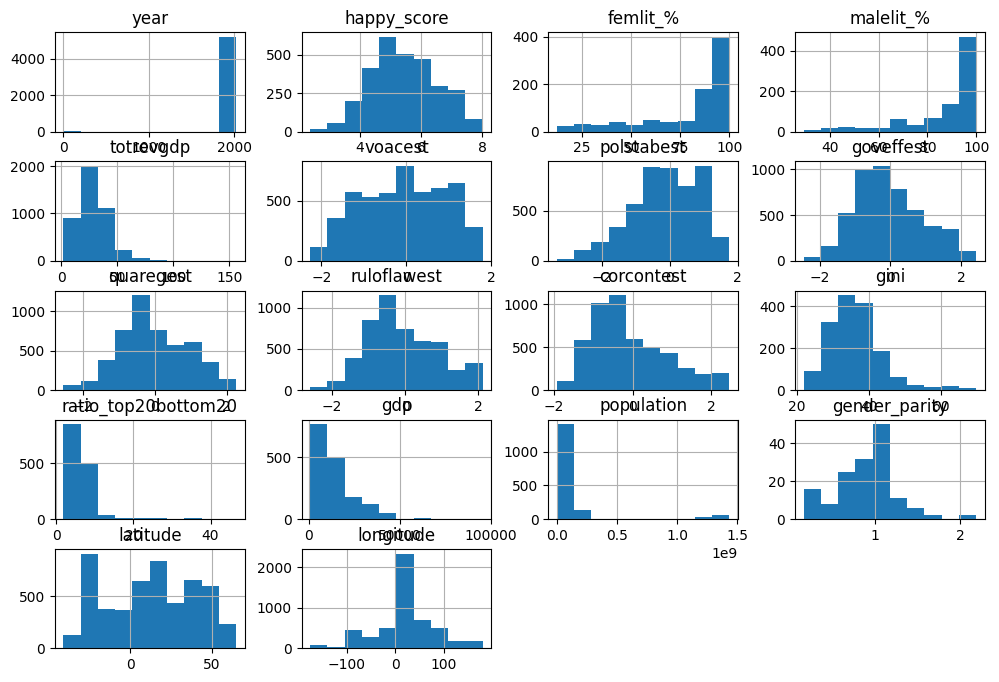

In [ ]:
final_merge.hist(figsize=(12,8)); # histogram

## **Income Inequality & Happiness**

In [ ]:
# creating dataset for explroing the impact of inequality on happiness
gdphappy = final_merge.groupby(['Region', 
                                'Income group','country']).agg({'happy_score': 'mean',
                                'ratio_top20bottom20': 'mean'})
gdphappy = gdphappy.reset_index() # resetting index

gdphappy.head()

,Region,Income group,country,happy_score,ratio_top20bottom20
0,East Asia & Pacific,High income,Australia,7.256879,5.685
1,East Asia & Pacific,High income,Brunei,NaN,NaN
2,East Asia & Pacific,High income,Japan,6.013143,NaN
3,East Asia & Pacific,High income,Nauru,NaN,5.730
4,East Asia & Pacific,High income,New Zealand,7.301291,NaN


,Region,Income group,country,happy_score,ratio_top20bottom20
89,Latin America & Caribbean,Lower middle income,Bolivia,5.724503,17.750000
144,Sub-Saharan Africa,Low income,Central African Republic,3.514954,13.885000
161,Sub-Saharan Africa,Low income,South Sudan,3.401875,13.100000
168,Sub-Saharan Africa,Lower middle income,Comoros,4.070123,13.285000
171,Sub-Saharan Africa,Lower middle income,Eswatini,4.435794,15.235000
174,Sub-Saharan Africa,Lower middle income,Lesotho,3.839400,16.520000
179,Sub-Saharan Africa,Lower middle income,Zambia,4.472416,15.736000
181,Sub-Saharan Africa,Upper middle income,Botswana,4.082502,22.770000
182,Sub-Saharan Africa,Upper middle income,Equatorial Guinea,NaN,21.960000
185,Sub-Saharan Africa,Upper middle income,Namibia,4.632347,20.320000


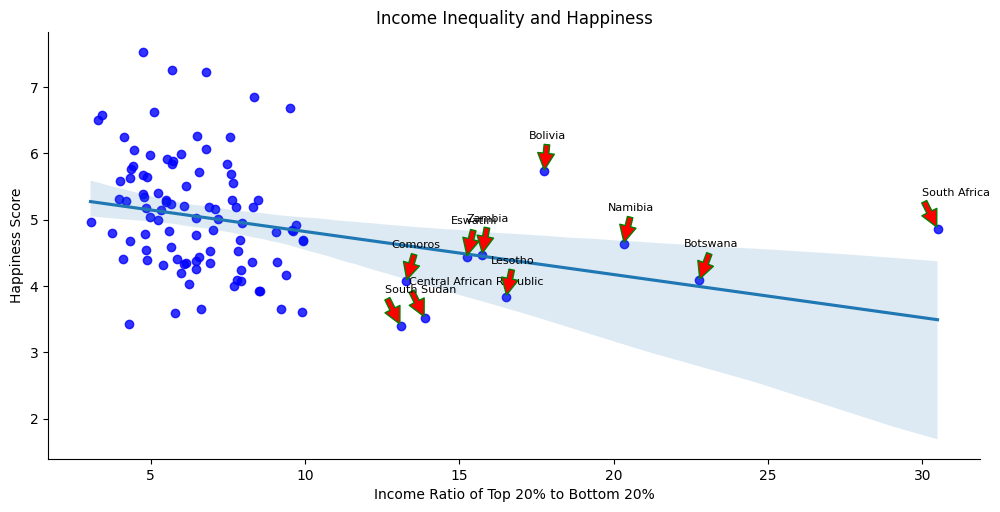

In [ ]:
# Creating regression plot to find the effect of income inequality on happiness
sns.lmplot(x='ratio_top20bottom20', y ='happy_score', data = gdphappy, scatter_kws={'color': 'blue'}, height=5, aspect=2, robust=True)

# Determining outliers 
q1 = gdphappy['ratio_top20bottom20'].quantile(0.25)
q3 = gdphappy['ratio_top20bottom20'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
outliers = gdphappy[(gdphappy['ratio_top20bottom20'] > upper_bound) | (gdphappy['ratio_top20bottom20'] < lower_bound)]

#sns.lmplot(x='ratio_top20bottom20', y='happy_score', data=gdphappy, scatter_kws={'color': 'blue'}, height=5, aspect=3, robust=True, hue=gdphappy['ratio_top20bottom20'].apply(lambda x: x > upper_bound or x < lower_bound), palette=['blue', 'red'])


# Labeling  outliers
for i, outlier in outliers.iterrows():
  # Generating a random number between -0.5 and 0.5 to minimize overlap
    #random_offset = (np.random.rand()-0.5) / 2
    plt.annotate(outlier['country'], xy=(outlier['ratio_top20bottom20'], outlier['happy_score']),
                 xytext=(outlier['ratio_top20bottom20']-0.5, outlier['happy_score']+0.5),
                 #xytext=(outlier['ratio_top20bottom20']-0.5, outlier['happy_score']+0.5+random_offset),
                 arrowprops=dict(facecolor='red' if i in outliers.index else 'black', edgecolor='green', shrink=0.05), fontsize=8)
    
plt.title('Income Inequality and Happiness')
plt.xlabel('Income Ratio of Top 20% to Bottom 20%')
plt.ylabel('Happiness Score')

outliers # dataframe for the outliers


The data suggest that happiness decreases with increased income inequality. In another words, the happiness is negatively correlated with increasing income disparity, both at the macro-economic level and micro-economic level(Lous & Graafland, 2021). The level of unhappiness becomes more pronounced in countries where redistribution of wealth is virtually absent or is very weak, and "the more income is concentrated in the hands of a few, the more likely individuals are to report lower levels of life satisfaction and more negative daily emotional experiences" (Neve and Powdthavee, 2016).

Lous, B., & Graafland, J. (2021). Who Becomes Unhappy when Income Inequality Increases? Applied Research in Quality of Life, 17(1), 299–316. https://doi.org/10.1007/s11482-020-09906-2

De Neve, J., & Powdthavee, N. (2016). Income Inequality Makes Whole Countries Less Happy. Harvard Business Review. https://hbr.org/2016/01/income-inequality-makes-whole-countries-less-happy

In [ ]:
import plotly.express as px #a quick simple one
fig = px.treemap(gdphappy , path=[px.Constant("Happiness and Inequality by Regions and Countries"),'Region', 'country', ], values='ratio_top20bottom20',
                  color='happy_score', hover_data=['country'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(gdphappy['happy_score'], weights=gdphappy['ratio_top20bottom20']))
fig.update_layout( legend_title='Happiness Score', legend_title_font_size=16, 
                  legend=dict(orientation='h', yanchor='bottom', y=0, xanchor='right', x=0))

The tree map clearly shows that the countries that are unequal--determined by the size of the boxes--are generally less happy. On average, the least happiest countries are South Sudan, Botswana. Lesotho, Central African Republic, Tanzania, Burundi, Rwanda, Afghanistan, Zimbabwe, Togo, and Haiti.

## **Happiness by Region**

In [ ]:
# creating dataset for explroing the impact of inequality on happiness
gdphappy1 = final_merge.groupby(['Region', 'year', 
                                #'Income group',
                                 #'country'
                                 ]).agg({'happy_score': 'mean',
                                #'ratio_top20bottom20': 'mean'
                                })
gdphappy1 = gdphappy1.reset_index() # resetting index

gdphappy1['year'] = gdphappy1['year'].fillna(0).astype(int) # converting the 
#'year' variable from object to integer

#gdphappy1.drop(gdphappy1[gdphappy1['year'] == 0].index, inplace=True)

# Converting year_var to a string to enable grouping
gdphappy1['year'] = gdphappy1['year'].astype(str)

# Converting the year_var column back to integers
gdphappy1['year'] = gdphappy1['year'].astype(int)

#creating the wide dataframe for the purpose of graph
wide_gdphappy1 = gdphappy1.pivot(index='year', columns='Region', values='happy_score') 

wide_gdphappy1 = wide_gdphappy1.reset_index()

# dropping rows with missing values
wide_gdphappy1 = wide_gdphappy1.dropna()

wide_gdphappy1.head()

Region,year,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
7,2005,5.543414,5.636961,5.964310,6.704869,7.481753,4.954475,4.465746
8,2006,5.463373,6.148497,6.009743,6.108944,7.485604,4.534499,4.276402
9,2007,5.226384,5.543690,6.098276,5.933482,7.487824,4.650745,4.269511
10,2008,5.430851,5.753014,6.248375,6.108777,7.650346,4.786475,4.233671
11,2009,5.703427,5.565592,6.129265,5.982249,7.426054,4.451573,4.566239


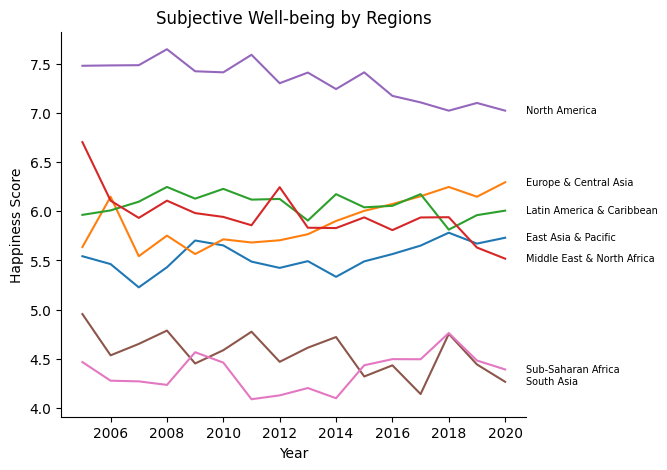

In [ ]:
#preparing line chart for comparing the trend for subjective well-being across regions

fig, ax = plt.subplots(figsize=(6, 5))


# plotting each variable
for variable in ['East Asia & Pacific',	'Europe & Central Asia',
                                 'Latin America & Caribbean',	
                                 'Middle East & North Africa',
                                 'North America',	'South Asia',	
                                 'Sub-Saharan Africa']:
    ax.plot(wide_gdphappy1['year'], wide_gdphappy1[variable], label=variable)


#adding label for each line just adjacent to the right end of each line
    x_pos = wide_gdphappy1['year'].iloc[-1]
    y_pos = wide_gdphappy1[variable].iloc[-1]
    value = wide_gdphappy1[variable].iloc[-1]
    label = f'{variable}: {value:.2f}'
    ax.annotate(variable, xy=(x_pos, y_pos), xytext=(15, 0),
                textcoords='offset points', ha='left', va='center', fontsize=7)
    
# removing the upper and right spines of the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# customizing the plot
ax.set_xlabel('Year')
ax.set_ylabel('Happiness Score')
ax.set_title('Subjective Well-being by Regions', fontsize=12);

**Interpretation**

On avergae, North America continues to be the happiest region across the timeframe; however, the happiness seems to be in decline.. South Asia is the least happiest region as it is more mired in conflicts and political instability, especially in Pakistan and Afghanistan. The region has overtaken Sub-Saharan Africa. Middle East and North Africa's people who used to be the second-most happiest people in the world in 2005 gradaully became less happier over most of the years. By the year 2020, the region had become the third-least happiest among the global geographies primarily affected by the conflicts in the middle-east, uprisings, and increasingly dictatorial regimes such as Egypt and Syria. The happiness level is higher in Europe and Central Asia, and the index is skewed by the impressive figures for socio-economic justice and equity and the promotion and protection of human rights and freedoms.

Source:
https://blogs.worldbank.org/arabvoices/developing-growing-less-happy-what-explains-paradox-arab-world

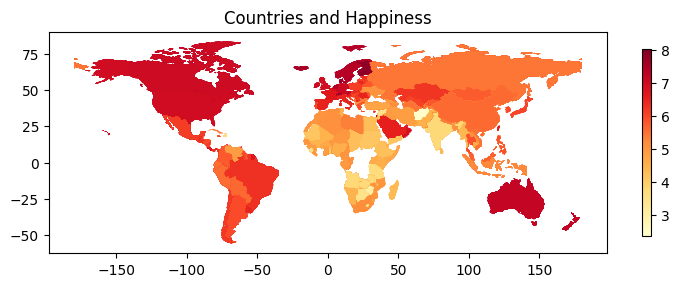

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged2 = world.merge(final_merge, left_on='name', right_on='country', how='left')

merged2= merged2.reset_index() # resetting index

merged2['year'] = merged2['year'].fillna(0).astype(int) # converting the 'year' variable from object to integer

merged2.drop(merged2[merged2['year'] == 0].index, inplace=True)

# Converting year_var to a string to enable grouping
merged2['year'] = merged2['year'].astype(str)

# Converting the year_var column back to integers
merged2['year'] = merged2['year'].astype(int)
fig, ax = plt.subplots(figsize=(9, 9))
merged2.plot(column='happy_score', cmap='YlOrRd',legend_kwds={
        "shrink":.27}, ax=ax,  legend=True)


# Adjusting the layout of the plot to remove the white space above the map
#plt.subplots_adjust(top=0.05, bottom=0.005, left=0.01, right=0.8)

ax.set_title('Countries and Happiness');

aok: try 2 or 3 color ramp say green-yellow-red or reverse as i do in my examples

## Happiness by Income Groups

The happiest countries are the ones with higher level of incomes, especially the North American and Nordic countries. The countries in South Asia  and Sub-Saharan Africa which are beset by seemingly insurmountable problems such as poverty, conflict, and issues of governance. 

In [ ]:
# creating dataset for examining by income groups
gdphappy2 = final_merge.groupby([#'Region', 
                                 'year', 
                                'Income group'
                                 #'country'
                                 ]).agg({'happy_score': 'mean',
                                #'ratio_top20bottom20': 'mean'
                                })
gdphappy2 = gdphappy2.reset_index() # resetting index

gdphappy2['year'] = gdphappy2['year'].fillna(0).astype(int) # converting the 'year' variable from object to integer

gdphappy2.drop(gdphappy2[gdphappy2['year'] == 0].index, inplace=True)

# Converting year_var to a string to enable grouping
gdphappy2['year'] = gdphappy2['year'].astype(str)

# Converting the year_var column back to integers
gdphappy2['year'] = gdphappy2['year'].astype(int)

#creating the wide dataframe for the purpose of graph
wide_gdphappy2 = gdphappy2.pivot(index='year', columns='Income group', values='happy_score') 

wide_gdphappy2 = wide_gdphappy2.reset_index()

# dropping rows with missing values
wide_gdphappy2 = wide_gdphappy2.dropna()

wide_gdphappy2.head()

Income group,year,High income,Low income,Lower middle income,Upper middle income
5,2004,6.625840,3.816575,4.740823,5.337105
6,2005,6.341191,4.432783,4.885733,5.484038
7,2006,6.848799,4.129602,4.839467,5.706263
8,2007,6.221621,4.257953,4.755136,5.426291
9,2008,6.517559,4.092609,4.986826,5.413203


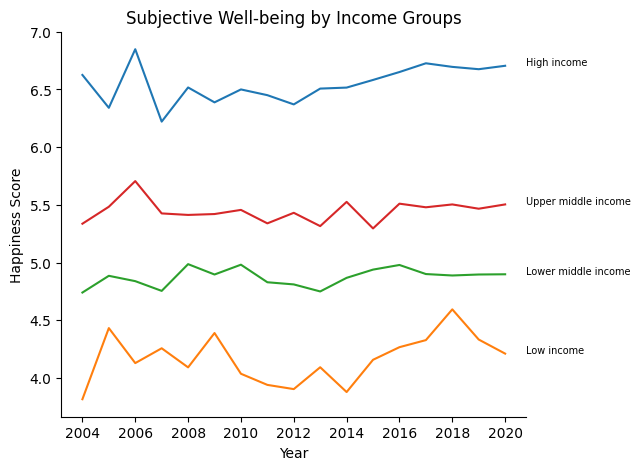

In [ ]:
#preparing line chart for comparing the trend for subjective well-being across incoem groups
fig, ax = plt.subplots(figsize=(6, 5))

# plotting each variable
for variable in ['High income',	'Low income',	
                 'Lower middle income',
                 'Upper middle income']:
   ax.plot(wide_gdphappy2['year'], wide_gdphappy2[variable], label=variable)

#adding label for each line just adjacent to the right end of each line
   x_pos = wide_gdphappy2['year'].iloc[-1]
   y_pos = wide_gdphappy2[variable].iloc[-1]
   value = wide_gdphappy2[variable].iloc[-1]
   label = f'{variable}: {value:.2f}'
   ax.annotate(variable, xy=(x_pos, y_pos), xytext=(15, 0),
                textcoords='offset points', fontsize=7)
   
# removing the upper and right spines of the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# customizing the plot
ax.set_xlabel('Year')
ax.set_ylabel('Happiness Score')
ax.set_title('Subjective Well-being by Income Groups', fontsize=12);

**Interpretation:**

There seems no change in change in order in perception of subjective well-being
by income groups. On average, people in the high income countries are the happiest whereas people in the low income countries are the least happiest. Overall, happiness seems to have increased in the low-income countries from 2004. This must have been the result of the wealth redistribution policies adopted by the governments in low-income countries(Dwyer & Dunn, 2022). On average, there is no change in happiness level in the lower middle income and the upper middle income countires. Most probably, the rise in income inequality explains why there is not much variation in happiness(Oishi et. al, 2022).

Reference:
Dwyer, R., & Dunn, E. W. (2022). Wealth redistribution promotes happiness. Proceedings of the National Academy of Sciences of the United States of America, 119(46). https://doi.org/10.1073/pnas.2211123119

Oishi, S., Cha, Y., Komiya, A., & Ono, H. (2022). Money and happiness: the income-happiness correlation is higher when income inequality is higher. PNAS Nexus. https://doi.org/10.1093/pnasnexus/pgac224

## **Gender Parity and Happiness**

In [ ]:
# creating a new dataframe to study literacy rate by gender, income groups and regions
literacy =final_merge.groupby(['Region', 'Income group', 'iso3code', 'country']).agg({'malelit_%': 'mean', 'femlit_%':'mean', 'happy_score': 'mean' })

# Resetting the index so that the index gets lost which leads to inability to plot graphs
literacy = literacy.reset_index()

literacy = literacy.dropna() #dropping misisng values 

literacy['gender_parity'] = literacy['femlit_%'] / literacy['malelit_%']# calculation of gender parity

literacy.head()

,Region,Income group,iso3code,country,malelit_%,femlit_%,happy_score,gender_parity
4,East Asia & Pacific,High income,SGP,Singapore,98.416945,94.550730,6.494145,0.960716
5,East Asia & Pacific,Lower middle income,IDN,Indonesia,96.102353,91.180600,5.233908,0.948786
6,East Asia & Pacific,Lower middle income,KHM,Cambodia,84.989346,69.912416,4.307844,0.822602
8,East Asia & Pacific,Lower middle income,MMR,Myanmar,88.776260,81.510259,4.408945,0.918154
9,East Asia & Pacific,Lower middle income,MNG,Mongolia,98.437620,98.368841,5.146136,0.999301


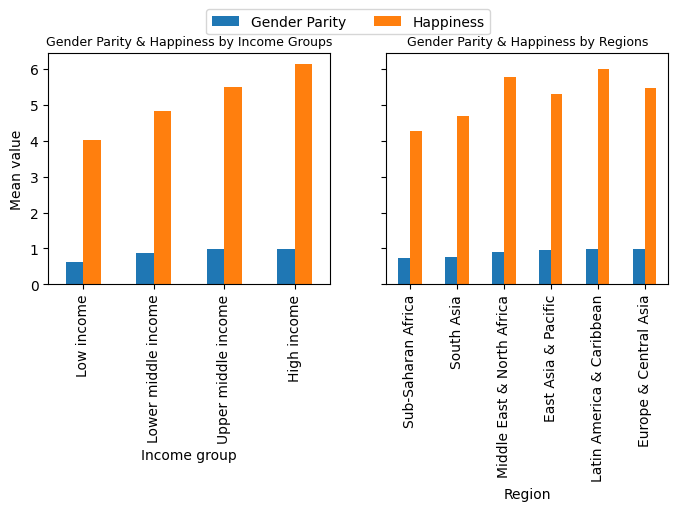

In [ ]:
# Creating Barcharts for Comparing happiness by regions and income groups

# grouping by income group and calculate means
grouped_income = literacy.groupby(['Income group']).agg({'gender_parity':'mean',
                                                        'happy_score': 'mean' })
# sort by happy_score
grouped_income = grouped_income.sort_values('gender_parity')

# grouping by region and calculate means
grouped_region = literacy.groupby(['Region']).agg({'gender_parity':'mean',
                                                   'happy_score': 'mean' })
# sort by happy_score
grouped_region = grouped_region.sort_values('gender_parity')

# creating figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3), sharey=True)

# plotting data on first subplot
grouped_income.plot(kind='bar', rot=0, ax=ax1)

ax1.set_xlabel('Income group')
ax1.set_ylabel('Mean value')
ax1.set_title('Gender Parity & Happiness by Income Groups', fontsize=9)
ax1.legend().set_visible(False)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# plotting data on second subplot
grouped_region.plot(kind='bar', rot=0, ax=ax2)
ax2.set_xlabel('Region')
ax2.set_ylabel('Mean value', fontsize=7)
ax2.set_title('Gender Parity & Happiness by Regions', fontsize=9)
ax2.legend().set_visible(False)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# setting a common legend for both subplots
fig.legend(['Gender Parity', 'Happiness'], loc='upper center', 
           bbox_to_anchor=(0.5, 1.05), ncol=2)

Happiness is related to equality, and gender parity (ratio of literate females to literate males with greate ratio implying more equity) in education has been associated with more economic freedom for women and girls. This increases happiness among them and ultimately improves the overall happiness of society. The  graphs makes sense as the rise in affluence means more affluence for citizens and access to education. 


Reference:

<a href="https://jp.weforum.org/reports/global-gender-gap-report-2022/in-full/1-5-performance-by-region/"> Global Gender Gap Report 2022 </a>

##Governance Indicators by Regions & Happiness

In [ ]:
# generating separate dataset for governnace indicators by regions 
gov_indic =final_merge.groupby(['Region']).agg({'voacest': 'mean', 
                            'polstabest': 'mean',	'goveffest': 'mean', 'quaregest': 'mean',	
                            'ruloflawest': 'mean',	'corcontest': 'mean', 'happy_score':'mean', 'ratio_top20bottom20': 'mean'  })

gov_indic  = gov_indic.reset_index() #resetting the index bar

gov_indic.head(10)

,Region,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,happy_score,ratio_top20bottom20
0,East Asia & Pacific,-0.160628,0.160527,0.024632,-0.146712,0.040942,-0.087458,5.519159,6.101255
1,Europe & Central Asia,0.555461,0.393385,0.625448,0.672948,0.540894,0.528139,5.901039,5.099335
2,Latin America & Caribbean,0.308488,-0.076165,-0.078678,0.060646,-0.242948,-0.145119,6.047913,8.564336
3,Middle East & North Africa,-0.589437,-0.443258,0.134310,0.082441,0.066078,0.038793,5.955779,6.668525
4,North America,1.467949,1.065132,1.786898,1.646400,1.741957,1.911693,7.339599,NaN
5,South Asia,-0.393570,-0.967436,-0.355606,-0.554502,-0.401238,-0.516045,4.581573,5.609091
6,Sub-Saharan Africa,-0.591391,-0.633230,-0.767267,-0.683465,-0.715600,-0.643910,4.348459,10.920504


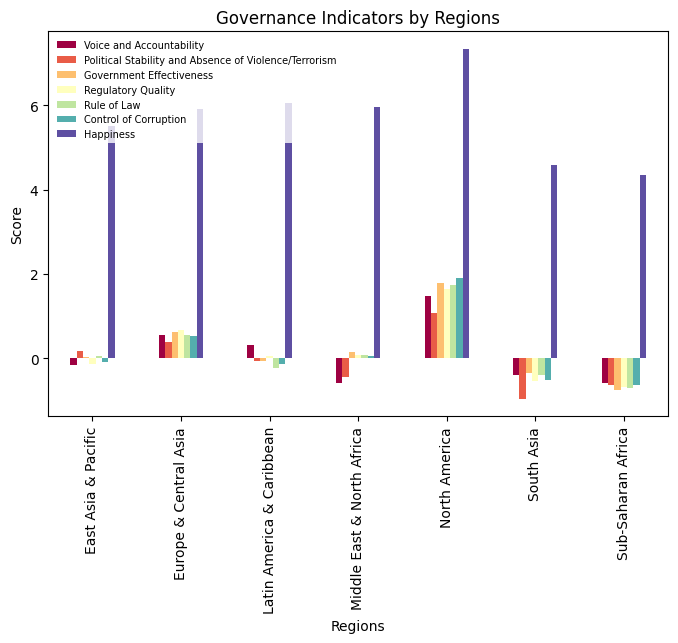

In [ ]:
                      #plotting 'governance indicator by region' barchart

#increasing the size of the barchart
plt.rcParams["figure.figsize"] = (8,5)

#my_cmap = plt.get_cmap("viridis")
 
 # plotting graph
gov_indic.plot(x="Region", y=['voacest', 'polstabest',	'goveffest',
             'quaregest',	'ruloflawest',	'corcontest', 'happy_score'], kind="bar", fontsize="10", colormap='Spectral')


 # Adding a title and labels to the x and y axes
plt.title('Governance Indicators by Regions', fontsize="12")
plt.xlabel('Regions', fontsize="10")
plt.ylabel('Score', fontsize="10")

# Changing the legend labels
legend = plt.legend(['Voice and Accountability', "Political Stability and Absence of Violence/Terrorism", 
                     'Government Effectiveness', 'Regulatory Quality', 'Rule of Law', 
                     "Control of Corruption", 'Happiness'], fontsize="7", loc='upper left', #bbox_to_anchor=(1.05, 1), 
                    #borderaxespad=0
                    )

#removing the legend outline
legend.get_frame().set_linewidth(0);

Overall, North America conspicuously and plausibly has best records for all the gworld governance indicators and happiness followed by Europe and Central Asia. Latin America and the Carribbean, despite reflective negative values in most of the indicators is happier than Europe and Central Asia. This is "due to social capital: intangible but invaluable assets such as friendship, family, or religion that make our lives fuller and that money could never replace" (Conci, 2019).

Source: 
Conci, P. (2019). Why Are Latin Americans Happier than Their GDP Would Suggest? Ideas Matter. https://blogs.iadb.org/ideas-matter/en/latin-americans-happier-gdp-suggest/#:~:text=Social%20networks%20are%20strong%20in,pillar%20of%20Latin%20Americans'%20lives.

In [ ]:
# generating separate dataset for governnace indicators by income groups
gov_indic1 =final_merge.groupby(['Income group']).agg({'voacest': 'mean', 
                            'polstabest': 'mean',	'goveffest': 'mean', 'quaregest': 'mean',	
                            'ruloflawest': 'mean',	'corcontest': 'mean', 'happy_score':'mean',  })

gov_indic1  = gov_indic1.reset_index() #resetting the index bar

gov_indic1.head()



,Income group,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,happy_score
0,High income,0.861746,0.707655,1.088987,1.077270,1.062164,1.084414,6.548005
1,Low income,-0.855960,-1.091962,-1.072058,-0.955909,-0.981899,-0.862067,4.150661
2,Lower middle income,-0.473107,-0.474003,-0.536945,-0.591367,-0.567975,-0.605498,4.876813
3,Upper middle income,-0.163275,-0.193090,-0.170885,-0.110992,-0.299442,-0.321876,5.453109


## Governance Indicators by Income Groups & Happiness

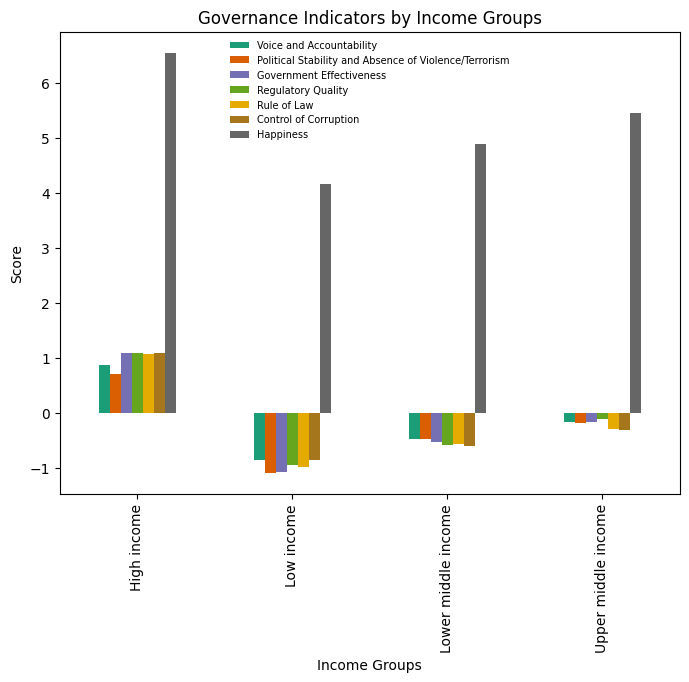

In [ ]:
#increasing the size of the barchart
plt.rcParams["figure.figsize"] = (8,6)


 # plotting graph
gov_indic1.plot(x="Income group", y=['voacest', 'polstabest',	'goveffest',
             'quaregest',	'ruloflawest',	'corcontest', 'happy_score'], kind="bar", fontsize="10", colormap='Dark2')

grouped_income = grouped_income.sort_values('Income group') 

 # Adding a title and labels to the x and y axes
plt.title('Governance Indicators by Income Groups', fontsize="12")
plt.xlabel('Income Groups', fontsize="10")
plt.ylabel('Score', fontsize="10")

# Changing the legend labels
legend = plt.legend(['Voice and Accountability', "Political Stability and Absence of Violence/Terrorism", 
                     'Government Effectiveness', 'Regulatory Quality', 'Rule of Law', 
                     "Control of Corruption", 'Happiness'], fontsize="7", loc='upper center', #bbox_to_anchor=(1.05, 1), 
                    #borderaxespad=0
                    )

#removing the legend outline
legend.get_frame().set_linewidth(0);

The above graph makes sense in that lower the level of affluence, greater is the problem of governance which translates to to decline in happiness.

# **CONCLUSION**

Overall,  greater the income inequality, lower the level of happiness. Happiness is also postively coorelated with level of affluence, and varies by regions with richer regions recording increased subjetive well-being. South Asia and Sub-Saharan Africa post less encourging figures as their level of happiness is lower than other regions  as most of the countires in these regions are poor and unequal and lack good governance.
